In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib import style

In [2]:
plt.style.use('seaborn-notebook')

In [3]:
tmp = pd.read_csv('C:/Users/quang/OneDrive/Máy tính/Data Prep/Home Credit Default Risk data/application_train.csv')

In [4]:
data = pd.read_csv('full_data.csv')

In [5]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
train = data.loc[
    data['CLASSIFICATION'] == 'train data'
]

In [7]:
train.TARGET = train.TARGET.astype('int8')

In [8]:
train.iloc[:,:13]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,Unaccompanied,Working,Secondary / secondary special
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,Unaccompanied,Pensioner,Secondary / secondary special
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,Unaccompanied,Working,Higher education
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,Unaccompanied,Commercial associate,Secondary / secondary special


### Distribution of Target

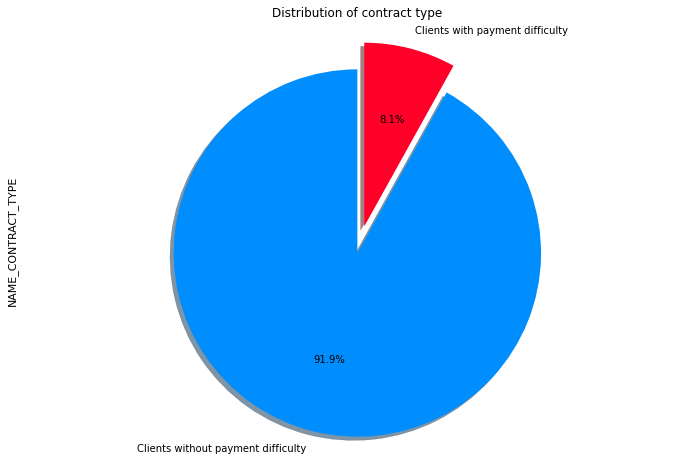

In [9]:
train.groupby(['TARGET']).size().plot(
    kind = 'pie',
    figsize = (12,8),
    labels = ['Clients without payment difficulty', 'Clients with payment difficulty'],
    autopct='%1.1f%%',
    explode = [0.15, 0],
    startangle=90,     
    shadow=True, 
    colors = ['#008eff', '#ff0028']
)
plt.title('Distribution of contract type')
plt.ylabel('NAME_CONTRACT_TYPE')
plt.axis('equal')
plt.show()


We see that the 8.07% (24,825) of the clients have difficulties while repayment of the loan out of 307,511 clients

## NAME_CONTRACT_TYPE: IDENTIFICATION IF THE LOAN IS CASH OR REVOLVING

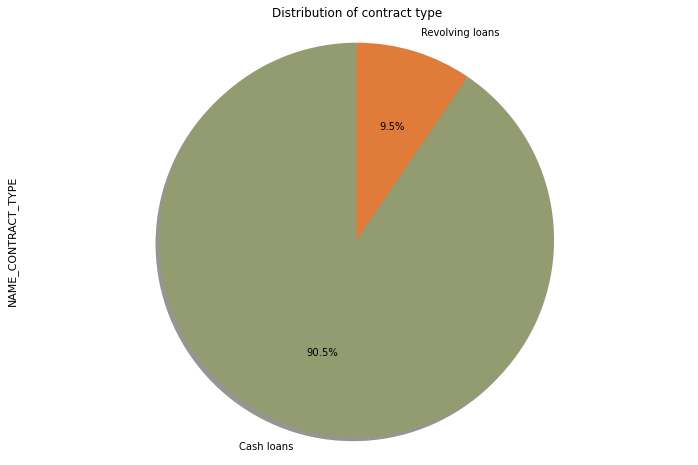

In [10]:
train.groupby(['NAME_CONTRACT_TYPE']).size().plot(
    kind = 'pie',
    figsize = (12,8),
    autopct='%1.1f%%',
    startangle=90,     
    shadow=True, 
    colors = ['#929c70', '#e07b39']
)
plt.title('Distribution of contract type')
plt.ylabel('NAME_CONTRACT_TYPE')
plt.axis('equal')
plt.show()


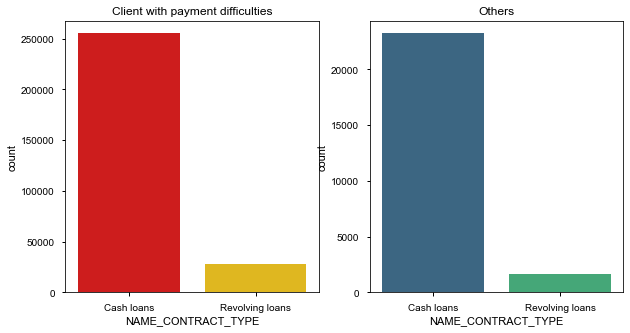

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
sns.countplot(train[train["TARGET"] == 0]['NAME_CONTRACT_TYPE'], ax= ax[0], palette='hot').set(title = 'Client with payment difficulties')
sns.countplot(train[train["TARGET"] == 1]['NAME_CONTRACT_TYPE'], ax= ax[1], palette='viridis').set(title = 'Others')
sns.set_style('whitegrid')
plt.show()

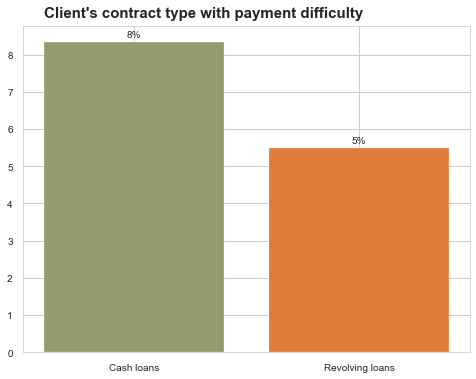

In [12]:
df1 = train[train["TARGET"] == 1]
df0 = train[train["TARGET"] == 0]
a1 = df1['NAME_CONTRACT_TYPE'].value_counts()
b1 = df0['NAME_CONTRACT_TYPE'].value_counts()
    
total = dict(train['NAME_CONTRACT_TYPE'].value_counts())
x0 = a1.index
x1 = b1.index
    
y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(x0,y0, color = ['#929c70', '#e07b39'])
for bar in ax.patches:
        bar_height = bar.get_height()
        ax.annotate('{0:.0f}%'.format(bar_height),
                xy = (bar.get_x() + bar.get_width()/2, bar_height),
                xytext = (0,3), textcoords = 'offset points', ha = 'center', va = 'bottom')
ax.text(x = -0.4, y = 9, s = "Client's contract type with payment difficulty",
           size = 15, weight = 'bold')
sns.set_style('whitegrid')
plt.show()

Most of the people are taking loans in the form of cash loans instead of revolving loans such as credit cards with 90.5% of contract type are Cash loans the rest is Revolving loans<br>
However, a larger propotion of revolving loans has been payed (3% more)

## CODE_GENDER :- Gender of the Client

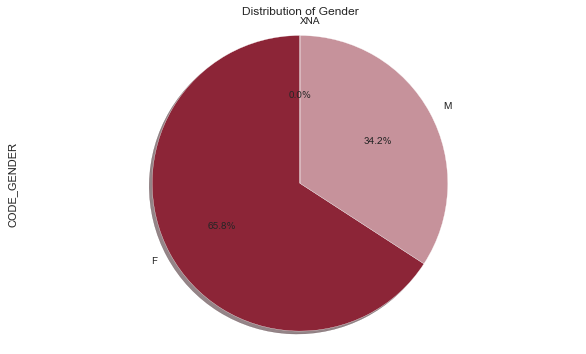

In [13]:
train.groupby(['CODE_GENDER']).size().plot(
    kind = 'pie',
    figsize = (10,6),
    autopct='%1.1f%%',
    startangle=90,     
    shadow=True, 
    colors = ['#8c2537', '#c6929b']
)
plt.title('Distribution of Gender')
plt.ylabel('CODE_GENDER')
plt.axis('equal')
plt.show()


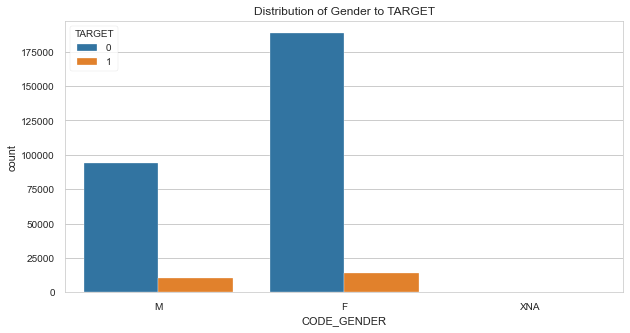

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (10,5))
sns.countplot(x = 'CODE_GENDER', data = train, hue = 'TARGET').set(title = 'Distribution of Gender to TARGET')
sns.set_style('whitegrid')
plt.show()

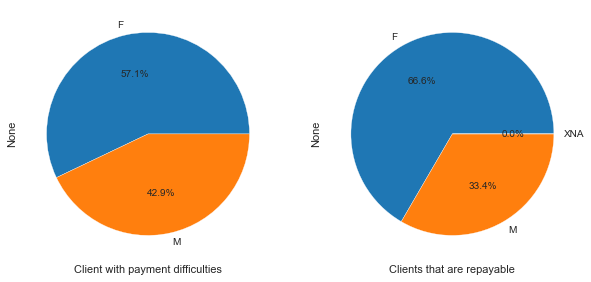

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
train.loc[train["TARGET"]==1, "CODE_GENDER"].reset_index().groupby("CODE_GENDER").size().plot(kind="pie", ax=ax1, autopct='%1.1f%%')
train.loc[train["TARGET"]==0, "CODE_GENDER"].reset_index().groupby("CODE_GENDER").size().plot(kind="pie", ax=ax2, autopct='%1.1f%%')
ax1.set_xlabel("Client with payment difficulties")
ax2.set_xlabel("Clients that are repayable")
plt.show()

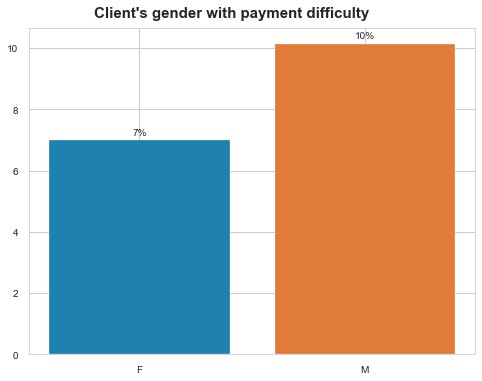

In [16]:
df1 = train[train["TARGET"] == 1]
df0 = train[train["TARGET"] == 0]
a1 = df1['CODE_GENDER'].value_counts()
b1 = df0['CODE_GENDER'].value_counts()
    
total = dict(train['CODE_GENDER'].value_counts())
x0 = a1.index
x1 = b1.index
    
y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(x0,y0, color = ['#1e81b0', '#e07b39'])
for bar in ax.patches:
        bar_height = bar.get_height()
        ax.annotate('{0:.0f}%'.format(bar_height),
                xy = (bar.get_x() + bar.get_width()/2, bar_height),
                xytext = (0,3), textcoords = 'offset points', ha = 'center', va = 'bottom')
ax.text(x = -0.2, y = 11, s = "Client's gender with payment difficulty",
           size = 15, weight = 'bold')
sns.set_style('whitegrid')
plt.show()

In [17]:
y0

[6.999328222555915, 10.141920254333279]

<span style="color:green">**XNA might be people who do not want to be indentified as Female or Male<br>
which is understandable due to the current state of society where there are<br>
more than two gender<br>
Female number of clients is almost twice as much as Male clients at 202,448 and <br>
105,059 applications filled respectively<br>
However, a larger percentage (about 10% of the total) of men had the problems in paying the loan or making installments within time as compared to women applicants (about 7%).**</span>

### Client's asset
### FLAG_OWN_CAR: Flag if the client owns a car | FLAG_OWN_REALTY: Flag if client owns a house or flat

In [18]:
asset = train['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0}) + train['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})
asset_df = asset.to_frame()

In [19]:
train['NUMBER_ASSET_OWNED'] = asset_df

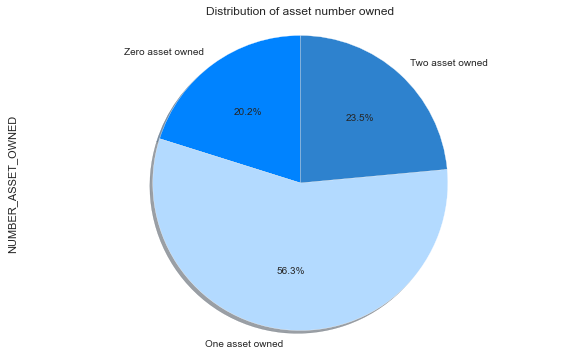

In [20]:
ax1 = train.groupby(['NUMBER_ASSET_OWNED']).size().plot(
    kind = 'pie',
    figsize = (10,6),
    labels = ['Zero asset owned', 'One asset owned', 'Two asset owned'],
    autopct='%1.1f%%',
    startangle=90,     
    shadow=True, 
    colors = ['#0083ff', '#b3daff','#2e82ce']
)
plt.title('Distribution of asset number owned')
plt.ylabel('NUMBER_ASSET_OWNED')
plt.axis('equal')

plt.show()


In [21]:
# fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 5))
# train.groupby(['TARGET', 'FLAG_OWN_CAR'
#             ]).size().reset_index().pivot(columns='TARGET',
#                                           index='FLAG_OWN_CAR',
#                                           values=0).plot(kind='bar',
#                                                          stacked=True)

# a1 = df1['FLAG_OWN_CAR'].value_counts()
# b1 = df0['FLAG_OWN_CAR'].value_counts()
    
# total = dict(train['FLAG_OWN_CAR'].value_counts())
# x0 = a1.index
# x1 = b1.index
    
# y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
# y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]


# ax1.bar(x1, y1, color = ['#1e81b0', '#e07b39'])
# for bar in ax1.patches:
#         bar_height = bar.get_height()
#         ax1.annotate('{0:.0f}%'.format(bar_height),
#                 xy = (bar.get_x() + bar.get_width()/2, bar_height),
#                 xytext = (0,3), textcoords = 'offset points', ha = 'center', va = 'bottom')
# ax1.text(x = -0.5, y = 100, s = "Client without payment difficulty",
#            size = 10.4, weight = 'bold')

# ax2.bar(x0, y0, color = ['#1e81b0', '#e07b39'])
# for bar in ax2.patches:
#         bar_height = bar.get_height()
#         ax2.annotate('{0:.0f}%'.format(bar_height),
#                 xy = (bar.get_x() + bar.get_width()/2, bar_height),
#                 xytext = (0,3), textcoords = 'offset points', ha = 'center', va = 'bottom')
# ax2.text(x = -0.5, y = 9.1, s = "Client with payment difficulty",
#            size = 10.4, weight = 'bold')

# plt.show()

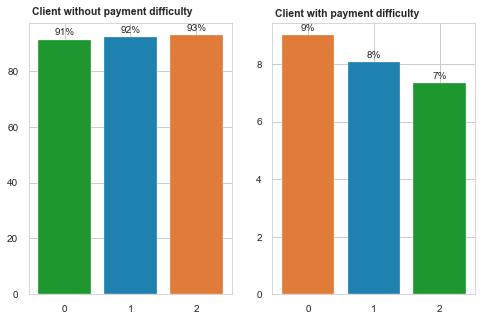

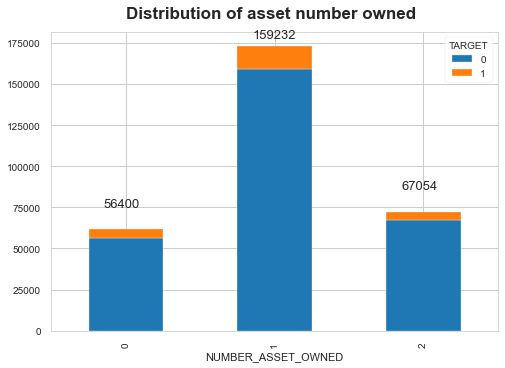

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 5))
graph = train.groupby(['TARGET', 'NUMBER_ASSET_OWNED'
            ]).size().reset_index().pivot(columns='TARGET',
                                          index='NUMBER_ASSET_OWNED',
                                          values=0).plot(kind='bar',
                                                         stacked=True)
for p in graph.patches[:3]:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    graph.annotate(f'{int(height)}', (x + 0.1, height + 19000), size = 13)

graph.text(x = 0, y = 190000, s = "Distribution of asset number owned",
           size = 17, weight = 'bold')

df1 = train[train["TARGET"] == 1]
df0 = train[train["TARGET"] == 0]
a1 = df1['NUMBER_ASSET_OWNED'].value_counts()
b1 = df0['NUMBER_ASSET_OWNED'].value_counts()
    
total = dict(train['NUMBER_ASSET_OWNED'].value_counts())
x0 = a1.index
x1 = b1.index
    
y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]


ax1.bar(x1, y1, color = ['#1e81b0', '#e07b39', '#1e982e'])
for bar in ax1.patches:
        bar_height = bar.get_height()
        ax1.annotate('{0:.0f}%'.format(bar_height),
                xy = (bar.get_x() + bar.get_width()/2, bar_height),
                xytext = (0,3), textcoords = 'offset points', ha = 'center', va = 'bottom')
ax1.text(x = -0.5, y = 100, s = "Client without payment difficulty",
           size = 10.4, weight = 'bold')

ax2.bar(x0, y0, color = ['#1e81b0', '#e07b39', '#1e982e'])
for bar in ax2.patches:
        bar_height = bar.get_height()
        ax2.annotate('{0:.0f}%'.format(bar_height),
                xy = (bar.get_x() + bar.get_width()/2, bar_height),
                xytext = (0,3), textcoords = 'offset points', ha = 'center', va = 'bottom')
ax2.text(x = -0.5, y = 9.65, s = "Client with payment difficulty",
           size = 10.4, weight = 'bold')

plt.show()

In [23]:
y0

[8.053516881377073, 8.991157296843737, 7.332780541735765]

In [24]:
x0

Int64Index([1, 0, 2], dtype='int64')

<span style="color:green">**A bit over half of the applicants for loans own only 1 valuable asset(56,3%) while owning two or no valuable asset is <br>relatively the same at 23,5% and 20,3% respectively<br>
<br> The difference between the number of asset owned and difficulty in <br> repaying loans is not enormous but this feature can somewhat be useful now that <br> we combine FLAG_OWN_CAR and FLAG_OWNED_REALTY together
**</span>

## AMT_INCOME_TOTAL: Income of the client

<Figure size 576x396 with 0 Axes>

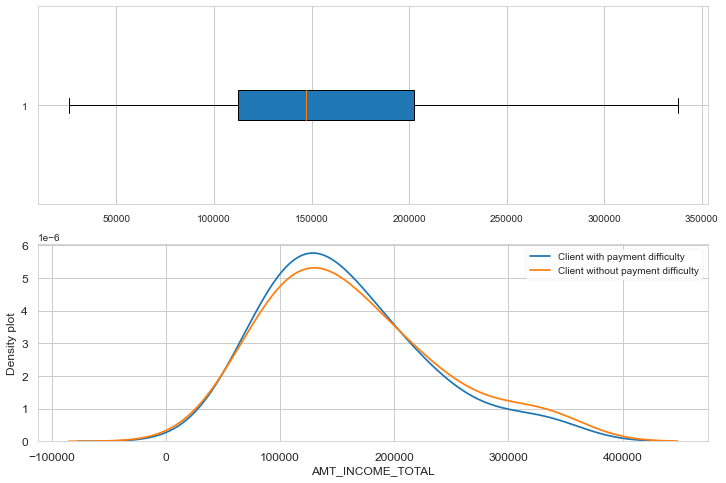

In [25]:
t1 = train.loc[
    (train['TARGET'] == 1) &
    (train['AMT_INCOME_TOTAL']),
    ['AMT_INCOME_TOTAL']
]
t0 = train.loc[
    (train['TARGET'] == 0) &
    (train['AMT_INCOME_TOTAL'])
              
]
sns.set_style('whitegrid')
plt.figure()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))

ax1.boxplot(train['AMT_INCOME_TOTAL'], patch_artist=True, vert=False)

sns.kdeplot(t1['AMT_INCOME_TOTAL'], bw=0.5,label="Client with payment difficulty")
sns.kdeplot(t0['AMT_INCOME_TOTAL'], bw=0.5,label="Client without payment difficulty")
plt.ylabel('Density plot', fontsize=12)
plt.xlabel('AMT_INCOME_TOTAL', fontsize=12)
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()
plt.show()

<span style="color:green">**We can tell that most people earn around 180,000 presumably US dollars<br>
It's easy to understand that as client's income grows, so is the probability<br>
that they don't have difficulty repaying loans.<br>
Suprisingly, people with low income at around 30,000 or less tend to repay more<br>
than those with the average income**</span>

### AMT_CREDIT: Credit amount of the loan

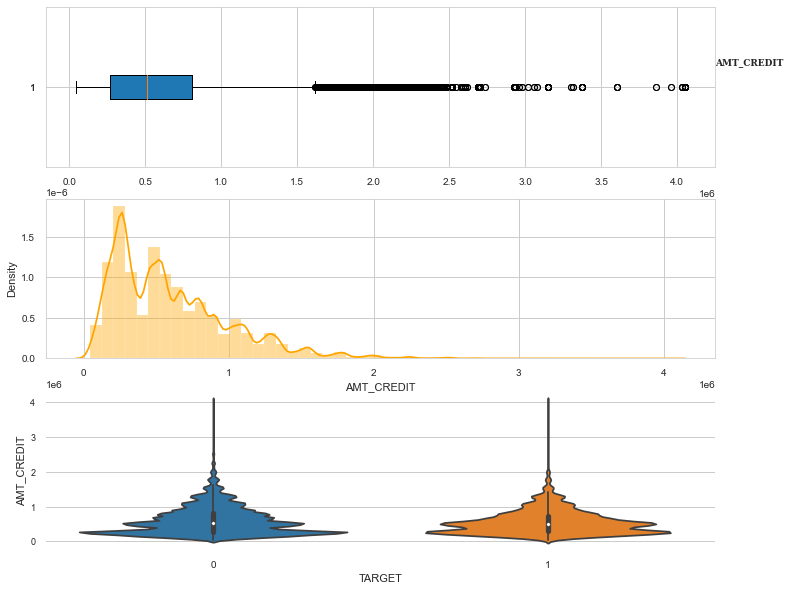

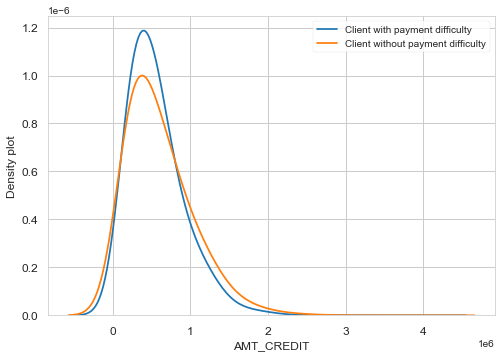

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (12, 10))

ax1.boxplot(train['AMT_CREDIT'], patch_artist=True, vert=False)

sns.distplot(train['AMT_CREDIT'].dropna(), color = 'orange', ax= ax2)
fig.text(0.9, 0.8, "AMT_CREDIT", fontsize = 9, fontweight = 'bold', fontfamily = 'serif')
plt.yticks(fontsize = 9)
plt.box(False)
t1 = train.loc[
    (train['TARGET'] == 1) &
    (train['AMT_CREDIT']),
    ['AMT_CREDIT']
]
t0 = train.loc[
    (train['TARGET'] == 0) &
    (train['AMT_CREDIT'])
              
]
sns.set_style('whitegrid')
plt.figure()

ax1.boxplot(train['AMT_CREDIT'], patch_artist=True, vert=False)

sns.violinplot(x='TARGET', y='AMT_CREDIT', data=train, ax = ax3)

sns.kdeplot(t1['AMT_CREDIT'], bw=0.5,label="Client with payment difficulty")
sns.kdeplot(t0['AMT_CREDIT'], bw=0.5,label="Client without payment difficulty")
plt.ylabel('Density plot', fontsize=12)
plt.xlabel('AMT_CREDIT', fontsize=12)
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()
plt.show()

<span style="color:green">**We can see from the Boxplot above that the Median Value of the Credit Amount of <br>the Customers who are capable of loan repayment is slightly larger than the <br>Median Value of Customers who are not capable of repayment.<br>
<br>This basically means that the customers with higher credit amount have a <br>slightly higher chances of being capable of loan repayment than customers <br>with lower credit amount.<br>
<br>Furthermore, there is a significant difference between repayable loans and
<br>difficulty repayable loans at the average credit amount (600,000 credit) <br>where people tend to have difficulty at this amount**</span>

## AMT_ANNUITY: Loan annuity

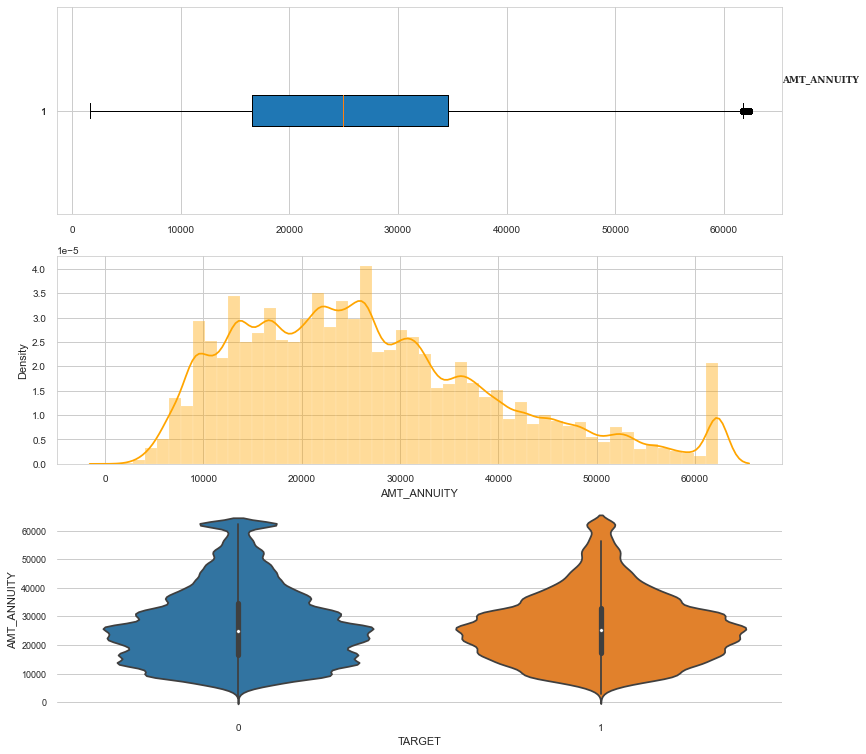

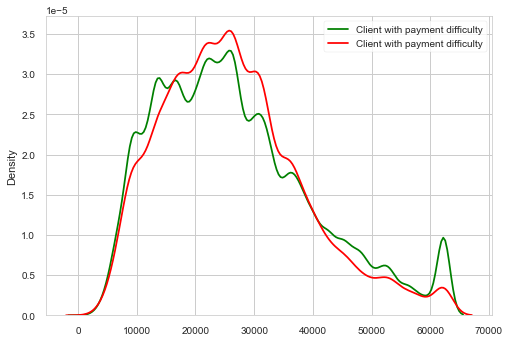

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (13, 13))

ax1.boxplot(train['AMT_ANNUITY'], patch_artist=True, vert=False)

sns.distplot(train['AMT_ANNUITY'].dropna(), color = 'orange', ax = ax2)
fig.text(0.9, 0.8, "AMT_ANNUITY", fontsize = 9, fontweight = 'bold', fontfamily = 'serif')
plt.yticks(fontsize = 9)
plt.box(False)

sns.violinplot(x='TARGET', y='AMT_ANNUITY', data=train, ax = ax3)

t1 = train[train['TARGET']==0]['AMT_ANNUITY'].values
t0 = train[train['TARGET']==1]['AMT_ANNUITY'].values
sns.set_style('whitegrid')
plt.figure()

ax1.boxplot(train['AMT_ANNUITY'], patch_artist=True, vert=False)

sns.distplot(t1,hist=False,label="Client with payment difficulty", color='green')
sns.distplot(t0,hist=False,label="Client with payment difficulty", color='red')
plt.legend()
plt.show()

<span style="color:green">**Most people pay annuity below Rs. 50K for the loans.**</span>

## DAYS_BIRTH: Client's age

In [28]:
capable_days_birth = train[train['TARGET']==0]['DAYS_BIRTH'].values/365*-1
not_capable_days_birth = train[train['TARGET']==1]['DAYS_BIRTH'].values/365*-1

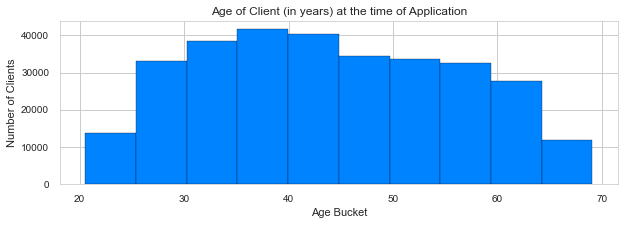

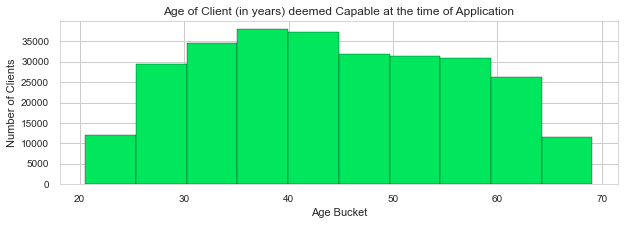

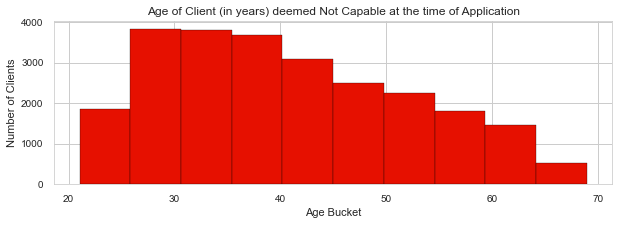

In [29]:
plt.figure(figsize=(10,3))
plt.hist(train['DAYS_BIRTH'].values/365*-1, bins=10, edgecolor='black', color='#0083ff')
plt.title('Age of Client (in years) at the time of Application')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(capable_days_birth, bins=10, edgecolor='black', color='#00e65d')
plt.title('Age of Client (in years) deemed Capable at the time of Application')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(not_capable_days_birth, bins=10, edgecolor='black', color='#e61000')
plt.title('Age of Client (in years) deemed Not Capable at the time of Application')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

<span style="color:green">**Most number of people applying for loans are in the range of (35-40) years <br>whereas this is followed by people in the range of (40-45) years whereas <br>the number of applicants in people aged <25 or aged>65 is very low.<br>
<br>Again, for the people who are deemed capable of loan repayment, people in <br>the same age buckets of (35-40) years and (40-45) years are deemed to be <br>most capable.<br>
<br>People aged in the buckets (25-30) years and (30-35) years have a large chance of being deemed not capable for loan repayment.** </span>

## NAME_TYPE_SUITE: Who was accompanying client when he was applying for the loan

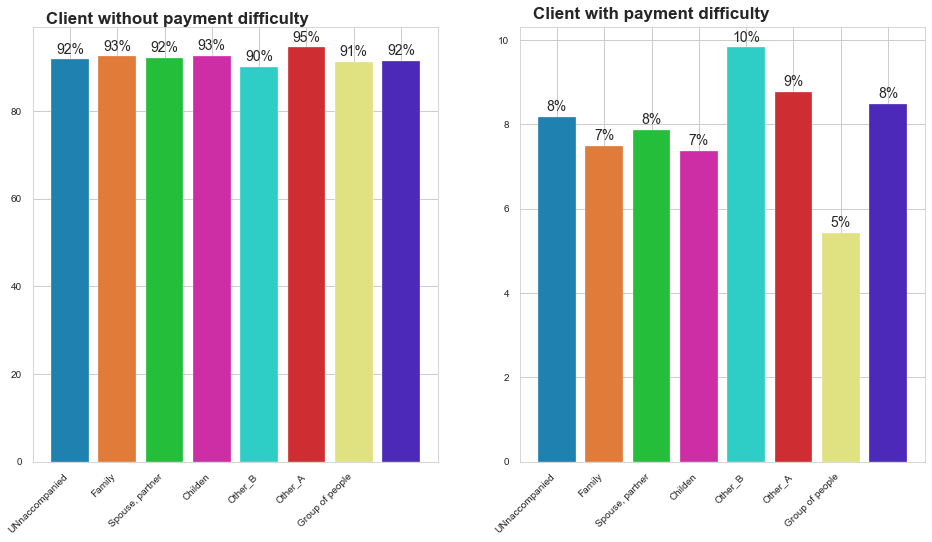

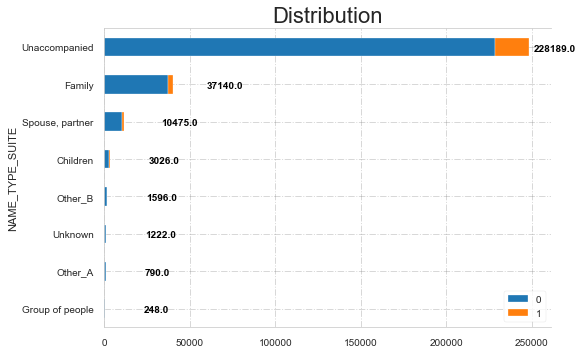

In [30]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 8))
graph = train.groupby(['TARGET', 'NAME_TYPE_SUITE'
            ]).size().reset_index().pivot(columns='TARGET',
                                         index='NAME_TYPE_SUITE',
                                          values=0).sort_values(
                                                        by = 0).plot.barh(
                                                         stacked=True)

graph.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 1,
        alpha = 0.3)

for i in graph.patches[:8]:
    graph.text(i.get_width()+23000, i.get_y()+0.15,
             str(round((i.get_width()), 6)),
             fontsize = 10, fontweight ='bold',
             color ='k')
    
graph.set_title('Distribution',
             size = 22)

for i in ['right']:
    graph.spines[i].set_visible(False)

graph.legend(loc = 'lower right')



a1 = df1['NAME_TYPE_SUITE'].value_counts()
b1 = df0['NAME_TYPE_SUITE'].value_counts()
    
total = dict(train['NAME_TYPE_SUITE'].value_counts())
x0 = a1.index
x1 = b1.index
    
y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

labels = ['UNnaccompanied', 'Family', 'Spouse, partner', 'Childen', 'Other_B', 'Other_A', 'Group of people']
ax1.bar(x1, y1, color = ['#1e81b0', '#e07b39', '#25be3a', '#ce2ea5', '#2ecec6', '#ce2e31', '#e0e282', '#4d29b9'])
for bar in ax1.patches:
        bar_height = bar.get_height()
        ax1.annotate('{0:.0f}%'.format(bar_height),
                xy = (bar.get_x() + bar.get_width()/2, bar_height),
                xytext = (0,3), textcoords = 'offset points', ha = 'center', va = 'bottom', size = 14)
ax1.text(x = -0.5, y = 100, s = "Client without payment difficulty",
           size = 17, weight = 'bold')
ax1.set_xticklabels(labels, rotation=45, ha='right')

ax2.bar(x0, y0, color = ['#1e81b0', '#e07b39', '#25be3a', '#ce2ea5', '#2ecec6', '#ce2e31', '#e0e282', '#4d29b9'])
for bar in ax2.patches:
        bar_height = bar.get_height()
        ax2.annotate('{0:.0f}%'.format(bar_height),
                xy = (bar.get_x() + bar.get_width()/2, bar_height),
                xytext = (0,3), textcoords = 'offset points', ha = 'center', va = 'bottom', size = 14)
ax2.text(x = -0.5, y = 10.5, s = "Client with payment difficulty",
           size = 17, weight = 'bold')
ax2.set_xticklabels(labels, rotation=45, ha='right')

plt.show()

<span style="color:green">**For the various types of people accompanying the client for loan, the client <br>comes unaccompanied to the bank in the most number of cases, out of which <br>approx. 92% of the time, the bank finds the client to be capable of loan <br>repayment whereas the remaining 8% of the time, the client is not capable <br>of the same.<br>
<br>Both in capability and non capability, 'Unaccompanied' as a class is the <br>majority class in this case.<br>
<br>The curve over here falls very sharply, which means that there is a lot of variability.**</span>

## NAME_INCOME_TYPE: Clients income type (businessman, working, maternity leave,…)

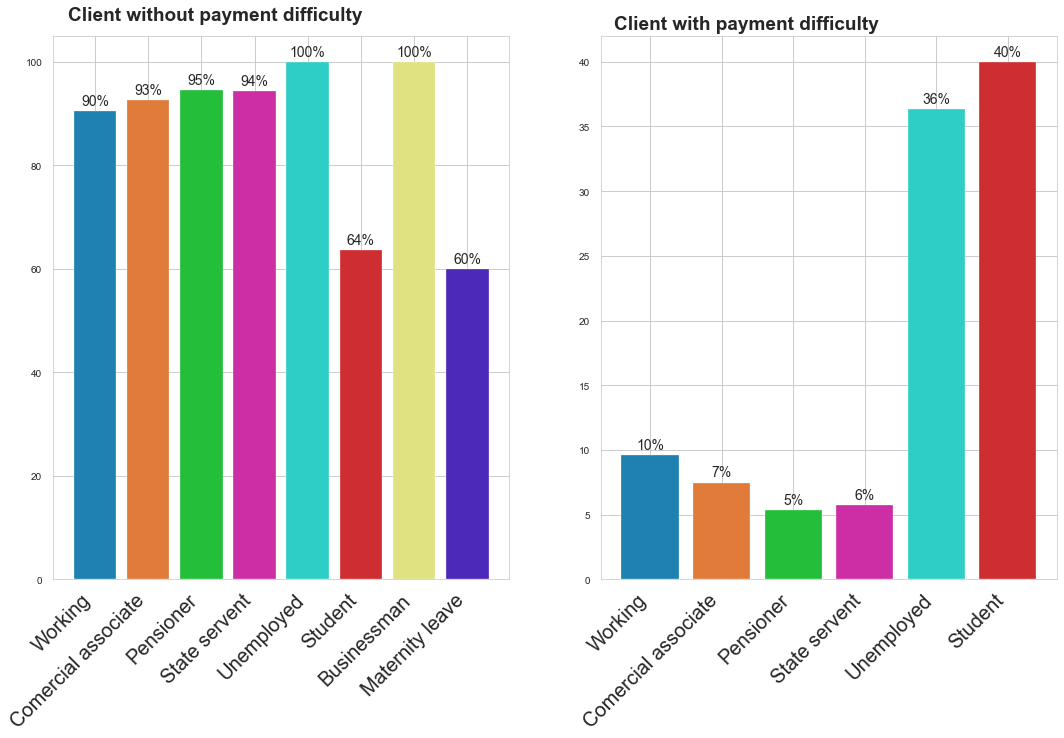

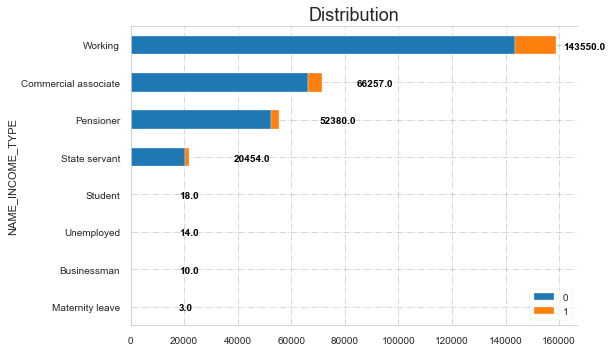

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (18, 10))
graph = train.groupby(['TARGET', 'NAME_INCOME_TYPE'
            ]).size().reset_index().pivot(columns='TARGET',
                                         index='NAME_INCOME_TYPE',
                                          values=0).sort_values(
                                                        by = 0).plot.barh(
                                                         stacked=True)

graph.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 1,
        alpha = 0.3)

for i in graph.patches[:8]:
    graph.text(i.get_width()+18000, i.get_y()+0.15,
             str(round((i.get_width()), 6)),
             fontsize = 10, fontweight ='bold',
             color ='k')
    
graph.set_title('Distribution',
             size = 18)

for i in ['right']:
    graph.spines[i].set_visible(False)

graph.legend(loc = 'lower right')



# train.groupby(['NAME_INCOME_TYPE']).size().plot(
#     kind = 'pie',
#     figsize = (5,6),
#     autopct='%1.1f%%',
#     startangle=90,     
#     shadow=True, 
#     colors = ['#929c70', '#e07b39']
# )
# plt.title('Distribution of contract type')
# plt.ylabel('NAME_INCOME_TYPE')
# plt.axis('equal')
# plt.show()



a1 = df1['NAME_INCOME_TYPE'].value_counts()
b1 = df0['NAME_INCOME_TYPE'].value_counts()
    
total = dict(train['NAME_INCOME_TYPE'].value_counts())
x0 = a1.index
x1 = b1.index
    
y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

labels = ['Working', 'Comercial associate', 'Pensioner', 'State servent', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']
ax1.bar(x1, y1, color = ['#1e81b0', '#e07b39', '#25be3a', '#ce2ea5', '#2ecec6', '#ce2e31', '#e0e282', '#4d29b9'])
for bar in ax1.patches:
        bar_height = bar.get_height()
        ax1.annotate('{0:.0f}%'.format(bar_height),
                xy = (bar.get_x() + bar.get_width()/2, bar_height),
                xytext = (0,3), textcoords = 'offset points', ha = 'center', va = 'bottom', size = 14)
ax1.text(x = -0.5, y = 108, s = "Client without payment difficulty",
           size = 19, weight = 'bold')
ax1.set_xticklabels(labels, rotation=45, ha='right', size = 20)

ax2.bar(x0, y0, color = ['#1e81b0', '#e07b39', '#25be3a', '#ce2ea5', '#2ecec6', '#ce2e31', '#e0e282', '#4d29b9'])
for bar in ax2.patches:
        bar_height = bar.get_height()
        ax2.annotate('{0:.0f}%'.format(bar_height),
                xy = (bar.get_x() + bar.get_width()/2, bar_height),
                xytext = (0,3), textcoords = 'offset points', ha = 'center', va = 'bottom', size = 14)
ax2.text(x = -0.5, y = 42.5, s = "Client with payment difficulty",
           size = 19, weight = 'bold')
ax2.set_xticklabels(labels, rotation=45, ha='right', size = 20)

plt.show()

<span style="color:green">**The people who are working take the most number of loans whereas Commercial <br>Associates, Pensioners and State Servants take considerably lesser number <br>of loans.<br>
<br>We have very little datapoints related to Unemployed people, Students, <br>Businessmen and women on Maternity leave. Again, there's a lot of variability in this scenario.<br>
<br>One interesting observation over here is the fact that whatever loans the <br>students and businessmen have applied to, they have been deemed capable of repayment of the same.**</span>

## NAME_EDUCATION_TYPE : Level of highest education the client achieved

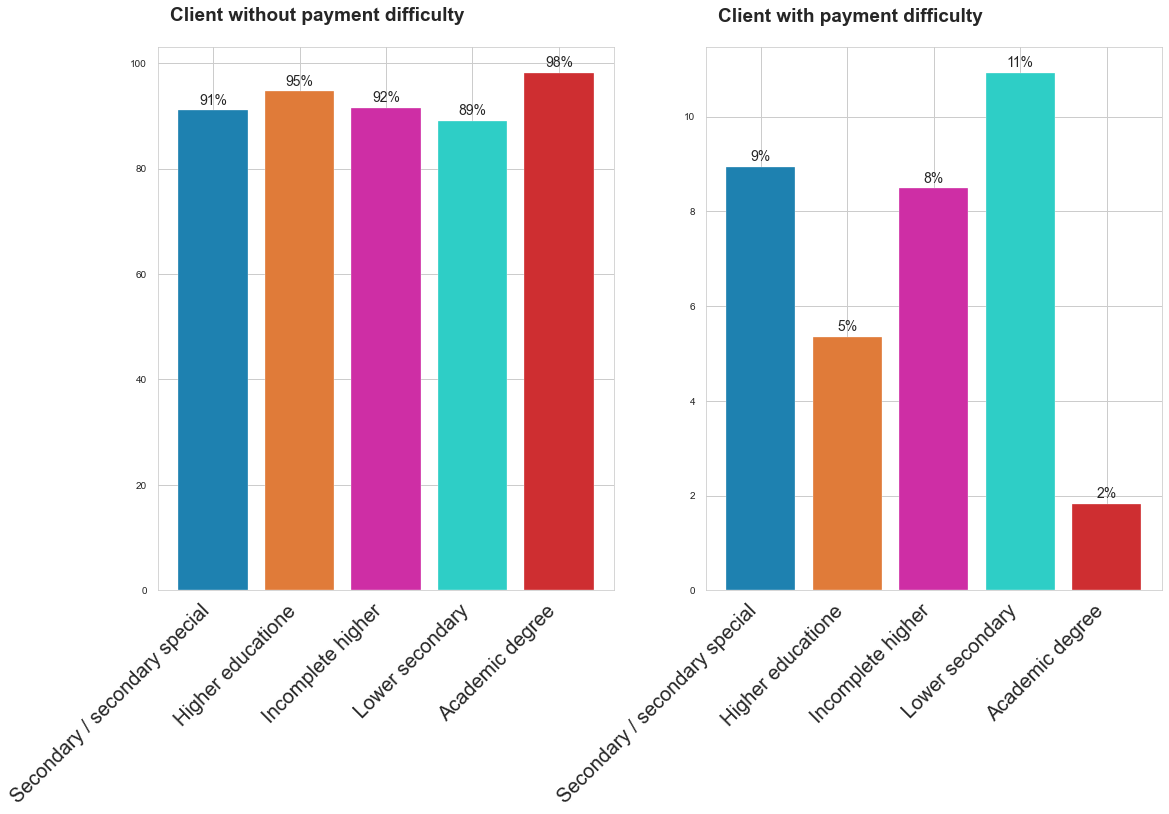

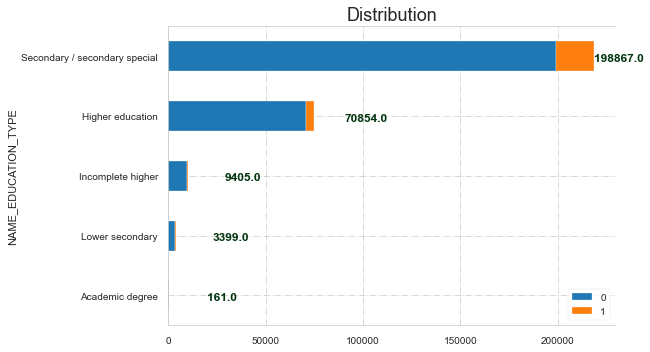

In [32]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (18, 10))
graph = train.groupby(['TARGET', 'NAME_EDUCATION_TYPE'
            ]).size().reset_index().pivot(columns='TARGET',
                                         index='NAME_EDUCATION_TYPE',
                                          values=0).sort_values(
                                                        by = 0).plot.barh(
                                                         stacked=True)

graph.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 1,
        alpha = 0.3)

for i in graph.patches[:5]:
    graph.text(i.get_width()+19500, i.get_y()+0.17,
             str(round((i.get_width()), 6)),
             fontsize = 12, fontweight ='bold',
             color ='#00330c')
    
graph.set_title('Distribution',
             size = 18)

for i in ['right']:
    graph.spines[i].set_visible(False)

graph.legend(loc = 'lower right')





a1 = df1['NAME_EDUCATION_TYPE'].value_counts()
b1 = df0['NAME_EDUCATION_TYPE'].value_counts()
    
total = dict(train['NAME_EDUCATION_TYPE'].value_counts())
x0 = a1.index
x1 = b1.index
    
y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

labels = ['Secondary / secondary special', 'Higher educatione', 'Incomplete higher', ' Lower secondary', 'Academic degree']
ax1.bar(x1, y1, color = ['#1e81b0', '#e07b39', '#ce2ea5', '#2ecec6', '#ce2e31'])
for bar in ax1.patches:
        bar_height = bar.get_height()
        ax1.annotate('{0:.0f}%'.format(bar_height),
                xy = (bar.get_x() + bar.get_width()/2, bar_height),
                xytext = (0,3), textcoords = 'offset points', ha = 'center', va = 'bottom', size = 14)
ax1.text(x = -0.5, y = 108, s = "Client without payment difficulty",
           size = 19, weight = 'bold')
ax1.set_xticklabels(labels, rotation=45, ha='right', size = 20)

ax2.bar(x0, y0, color = ['#1e81b0', '#e07b39', '#ce2ea5', '#2ecec6', '#ce2e31'])
for bar in ax2.patches:
        bar_height = bar.get_height()
        ax2.annotate('{0:.0f}%'.format(bar_height),
                xy = (bar.get_x() + bar.get_width()/2, bar_height),
                xytext = (0,3), textcoords = 'offset points', ha = 'center', va = 'bottom', size = 14)
ax2.text(x = -0.5, y = 12, s = "Client with payment difficulty",
           size = 19, weight = 'bold')
ax2.set_xticklabels(labels, rotation=45, ha='right', size = 20)

plt.show()

<span style="color:green"> **Again, there's a lot of variability in this scenario among education types of <br>the applicants.<br>
<br>People with Secondary/Secondary Special as the highest level of education <br>apply for most number of loans and they are also the highest defaulters. <br>However, the default percentage is not very different across various education levels.**</span>

## NAME_FAMILY_STATUS: Family status of the client

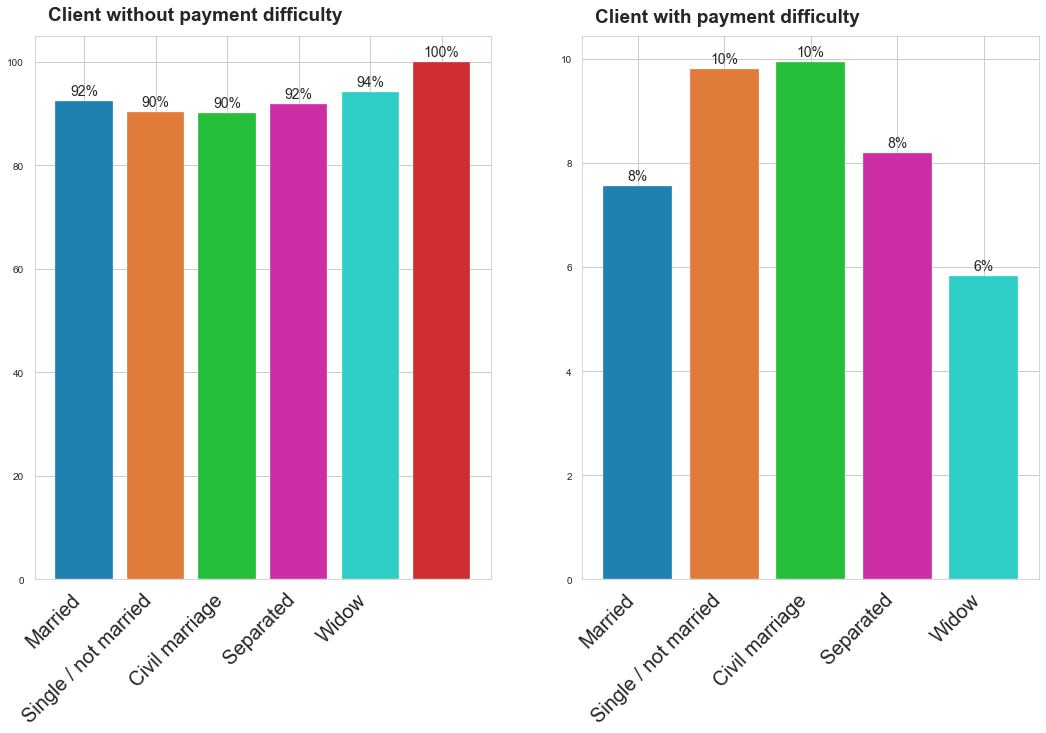

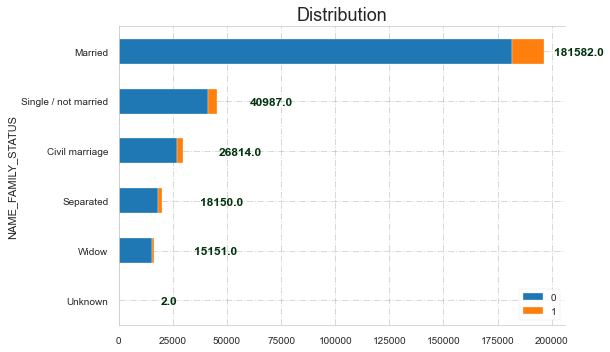

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (18, 10))
graph = train.groupby(['TARGET', 'NAME_FAMILY_STATUS'
            ]).size().reset_index().pivot(columns='TARGET',
                                         index='NAME_FAMILY_STATUS',
                                          values=0).sort_values(
                                                        by = 0).plot.barh(
                                                         stacked=True)

graph.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 1,
        alpha = 0.3)

for i in graph.patches[:6]:
    graph.text(i.get_width()+19500, i.get_y()+0.17,
             str(round((i.get_width()), 6)),
             fontsize = 12, fontweight ='bold',
             color ='#00330c')
    
graph.set_title('Distribution',
             size = 18)

for i in ['right']:
    graph.spines[i].set_visible(False)

graph.legend(loc = 'lower right')





a1 = df1['NAME_FAMILY_STATUS'].value_counts()
b1 = df0['NAME_FAMILY_STATUS'].value_counts()
    
total = dict(train['NAME_FAMILY_STATUS'].value_counts())
x0 = a1.index
x1 = b1.index
    
y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

labels = ['Married', 'Single / not married', 'Civil marriage', ' Separated', 'Widow']
ax1.bar(x1, y1, color = ['#1e81b0', '#e07b39', '#25be3a', '#ce2ea5', '#2ecec6', '#ce2e31'])
for bar in ax1.patches:
        bar_height = bar.get_height()
        ax1.annotate('{0:.0f}%'.format(bar_height),
                xy = (bar.get_x() + bar.get_width()/2, bar_height),
                xytext = (0,3), textcoords = 'offset points', ha = 'center', va = 'bottom', size = 14)
ax1.text(x = -0.5, y = 108, s = "Client without payment difficulty",
           size = 19, weight = 'bold')
ax1.set_xticklabels(labels, rotation=45, ha='right', size = 20)

ax2.bar(x0, y0, color = ['#1e81b0', '#e07b39', '#25be3a', '#ce2ea5', '#2ecec6', '#ce2e31'])
for bar in ax2.patches:
        bar_height = bar.get_height()
        ax2.annotate('{0:.0f}%'.format(bar_height),
                xy = (bar.get_x() + bar.get_width()/2, bar_height),
                xytext = (0,3), textcoords = 'offset points', ha = 'center', va = 'bottom', size = 14)
ax2.text(x = -0.5, y = 10.7, s = "Client with payment difficulty",
           size = 19, weight = 'bold')
ax2.set_xticklabels(labels, rotation=45, ha='right', size = 20)

plt.show()

<span style="color:green">**There is variability among the Family Status of the applicants but there is not <br>much variability if the majority class (Married) is ignored.<br>
<br>Married people apply for the most number of loans and the number of people <br>deemed incapable of repayment is also the highest.**</span>

## DAYS_EMPLOYED: How many days before the application the person started current employment

In [34]:
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].values*-1/365

In [35]:
under10year = train.loc[(train['DAYS_EMPLOYED'] > 0) &
          (train['DAYS_EMPLOYED'] < 10),
          'DAYS_EMPLOYED'
         ].count()

over10year = train.loc[(train['DAYS_EMPLOYED'] > 10),
          'DAYS_EMPLOYED'
         ].count()

d = {'Over 10 years employed': over10year, 'Under 10 years employed': under10year}
pie_data = pd.DataFrame(data = [under10year, over10year], index = ['Under 10 years employed', 'Over 10 years employed'])

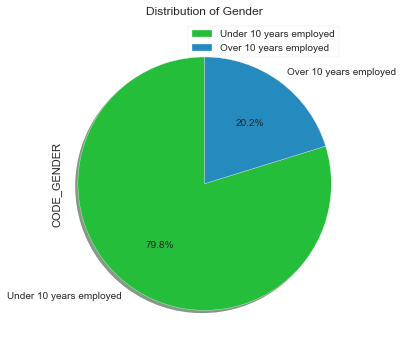

In [36]:
pie_data.plot(
    kind = 'pie',
    figsize = (5,6),
    autopct='%1.1f%%',
    startangle=90,     
    shadow=True, 
    colors = ['#25be3a', '#258abe'],
    subplots = True
)
plt.title('Distribution of Gender')
plt.ylabel('CODE_GENDER')
plt.axis('equal')
plt.show()


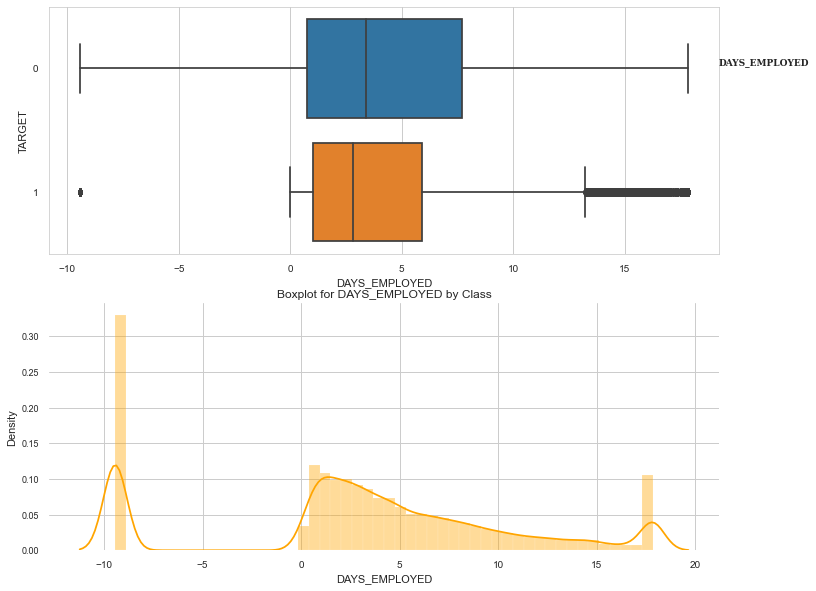

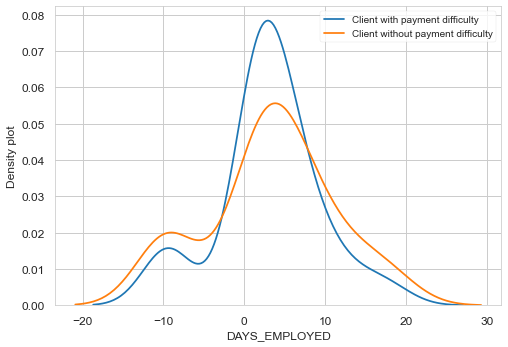

In [37]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (12, 10))

sns.boxplot(data=train, x = train['DAYS_EMPLOYED'], y = train['TARGET'], orient = "h", ax = ax1)
plt.title(f'Boxplot for DAYS_EMPLOYED by Class')

sns.distplot(train['DAYS_EMPLOYED'], color = 'orange')
fig.text(0.9, 0.8, "DAYS_EMPLOYED", fontsize = 9, fontweight = 'bold', fontfamily = 'serif')
plt.yticks(fontsize = 9)
plt.box(False)
t1 = train.loc[
    (train['TARGET'] == 1) &
    (train['DAYS_EMPLOYED']),
    ['DAYS_EMPLOYED']
]
t0 = train.loc[
    (train['TARGET'] == 0) &
    (train['DAYS_EMPLOYED']),
    ['DAYS_EMPLOYED']
]
sns.set_style('whitegrid')
plt.figure()


sns.kdeplot(t1['DAYS_EMPLOYED'], bw=0.5,label="Client with payment difficulty")
sns.kdeplot(t0['DAYS_EMPLOYED'], bw=0.5,label="Client without payment difficulty")
plt.ylabel('Density plot', fontsize=12)
plt.xlabel('DAYS_EMPLOYED', fontsize=12)
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()
plt.show()

Here also, we have already converted the days into years for easy analysis, and <br>we can see from the histogram that most of the clients that have worked <br>under 10 years(79.8%)<br>
Easy to understand that the longer you work the less difficult you find yourself repaying loans

## DAYS_REGISTRATION: How many days before the application did client change his registration

In [38]:
train['DAYS_REGISTRATION'] = train['DAYS_REGISTRATION'].values*-1

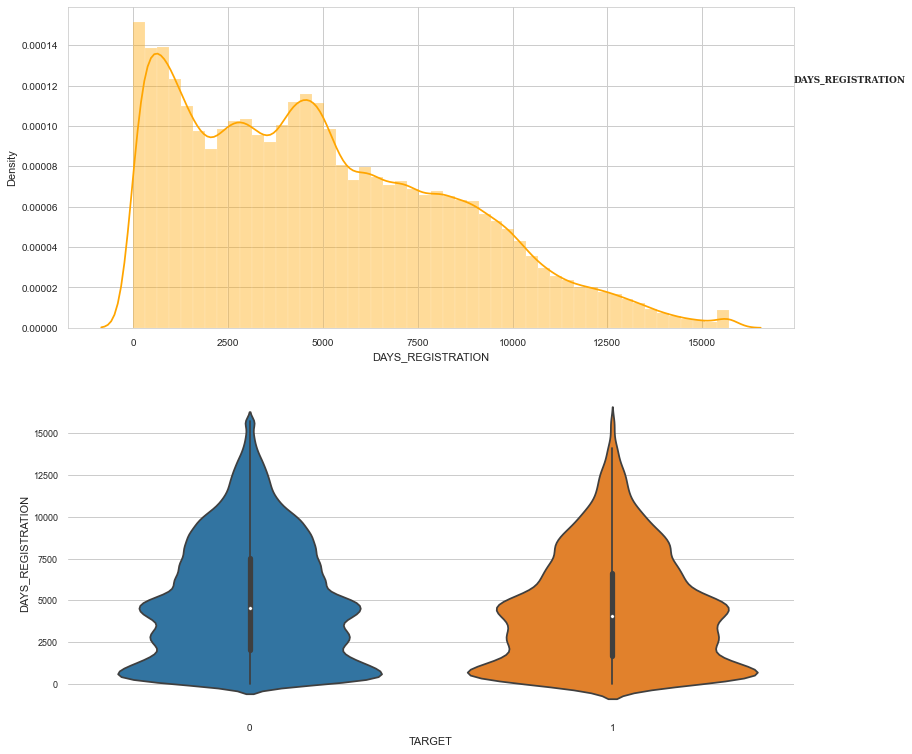

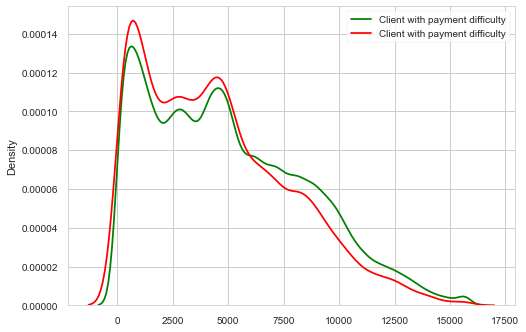

In [39]:
fig, (ax2, ax3) = plt.subplots(2,1, figsize = (13, 13))


sns.distplot(train['DAYS_REGISTRATION'].dropna(), color = 'orange', ax = ax2)
fig.text(0.9, 0.8, "DAYS_REGISTRATION", fontsize = 9, fontweight = 'bold', fontfamily = 'serif')
plt.yticks(fontsize = 9)
plt.box(False)

sns.violinplot(x='TARGET', y='DAYS_REGISTRATION', data=train, ax = ax3)

t1 = train[train['TARGET']==0]['DAYS_REGISTRATION'].values
t0 = train[train['TARGET']==1]['DAYS_REGISTRATION'].values
sns.set_style('whitegrid')
plt.figure()

ax1.boxplot(train['DAYS_REGISTRATION'], patch_artist=True, vert=False)

sns.distplot(t1,hist=False,label="Client with payment difficulty", color='green')
sns.distplot(t0,hist=False,label="Client with payment difficulty", color='red')
plt.legend()
plt.show()

<span style="color:green">**Most of the clients have changed their registration less than 15000 days (41 <br>years) before the loan application, whereas in most cases it is less than <br>5000 days (13 years).**</span>

## OWN_CAR_AGE: Age of client's car

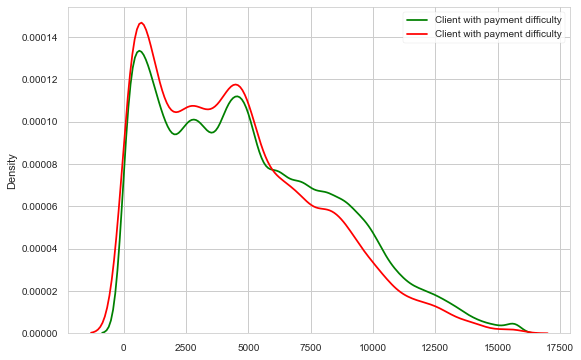

In [40]:
fig, ax1= plt.subplots(1,1, figsize = (9, 6))
sns.distplot(t1,hist=False,label="Client with payment difficulty", color='green')
sns.distplot(t0,hist=False,label="Client with payment difficulty", color='red')
plt.legend()
plt.show()

## OCCUPATION_TYPE: What kind of occupation does the client have

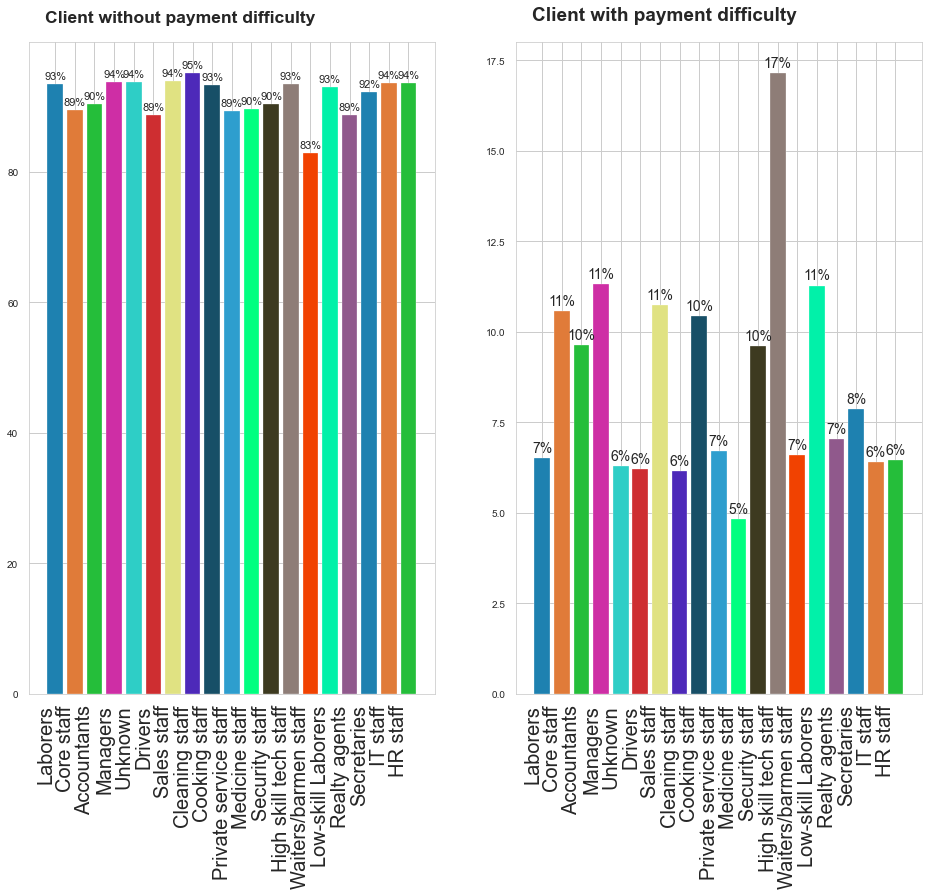

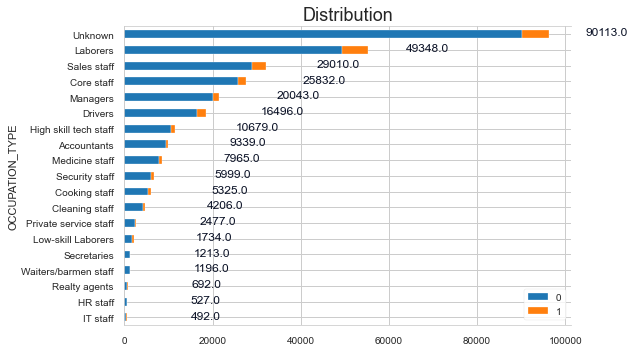

In [41]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 12))
graph = train.groupby(['TARGET', 'OCCUPATION_TYPE'
            ]).size().reset_index().pivot(columns='TARGET',
                                         index='OCCUPATION_TYPE',
                                          values=0).sort_values(
                                                        by = 0).plot.barh(
                                                         stacked=True)

for i in graph.patches[:19]:
    graph.text(i.get_width()+14500, i.get_y()+0.17,
             str(round((i.get_width()), 6)),
             fontsize = 12,
             color ='#080f24')
    
graph.set_title('Distribution',
             size = 18)

for i in ['right']:
    graph.spines[i].set_visible(False)

graph.legend(loc = 'lower right')





a1 = df1['OCCUPATION_TYPE'].value_counts()
b1 = df0['OCCUPATION_TYPE'].value_counts()
    
total = dict(train['OCCUPATION_TYPE'].value_counts())
x0 = a1.index
x1 = b1.index
    
y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

labels = ['Laborers', 'Core staff', 'Accountants', 'Managers', 'Unknown',
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff']
ax1.bar(x1, y1, color =['#1e81b0', '#e07b39', '#25be3a',
                        '#ce2ea5', '#2ecec6', '#ce2e31', '#e0e282', '#4d29b9',
                       '#174f67', '#2e9ece', '#00ff80', '#3d3a20', '#8e7d77',
                        '#F14201', '#01f1a9', '#90598c'])
for bar in ax1.patches:
        bar_height = bar.get_height()
        ax1.annotate('{0:.0f}%'.format(bar_height),
                xy = (bar.get_x() + bar.get_width()/2, bar_height),
                xytext = (0,3), textcoords = 'offset points', ha = 'center', va = 'bottom', size = 11)
ax1.text(x = -0.5, y = 103, s = "Client without payment difficulty",
           size = 17.5, weight = 'bold')
ax1.set_xticklabels(labels, rotation=90, ha='right', size = 20)

ax2.bar(x0, y0, color = ['#1e81b0', '#e07b39', '#25be3a',
                        '#ce2ea5', '#2ecec6', '#ce2e31', '#e0e282', '#4d29b9',
                       '#174f67', '#2e9ece', '#00ff80', '#3d3a20', '#8e7d77',
                        '#F14201', '#01f1a9', '#90598c'])

for bar in ax2.patches:
        bar_height = bar.get_height()
        ax2.annotate('{0:.0f}%'.format(bar_height),
                xy = (bar.get_x() + bar.get_width()/2, bar_height),
                xytext = (0,3), textcoords = 'offset points', ha = 'center', va = 'bottom', size = 14)
ax2.text(x = -0.5, y = 18.6, s = "Client with payment difficulty",
           size = 19, weight = 'bold')
ax2.set_xticklabels(labels, rotation=90, ha='right', size = 20)
    
plt.show()

<span style="color:green"> **Out of all the possible Occupation Types, the majority of applicants have not provided their
<br>Occupation Type in the application (approx. 31.39%) which is followed by Laborers (approx.
18%).<br>
<br>Out of all the occupations, Waiters/barmen staff are considered to be the least capable of
<br>repayment followed by Laborers -> though laborers have considerably higher applications as
compared to Waiters/barmen staff.
** </span>

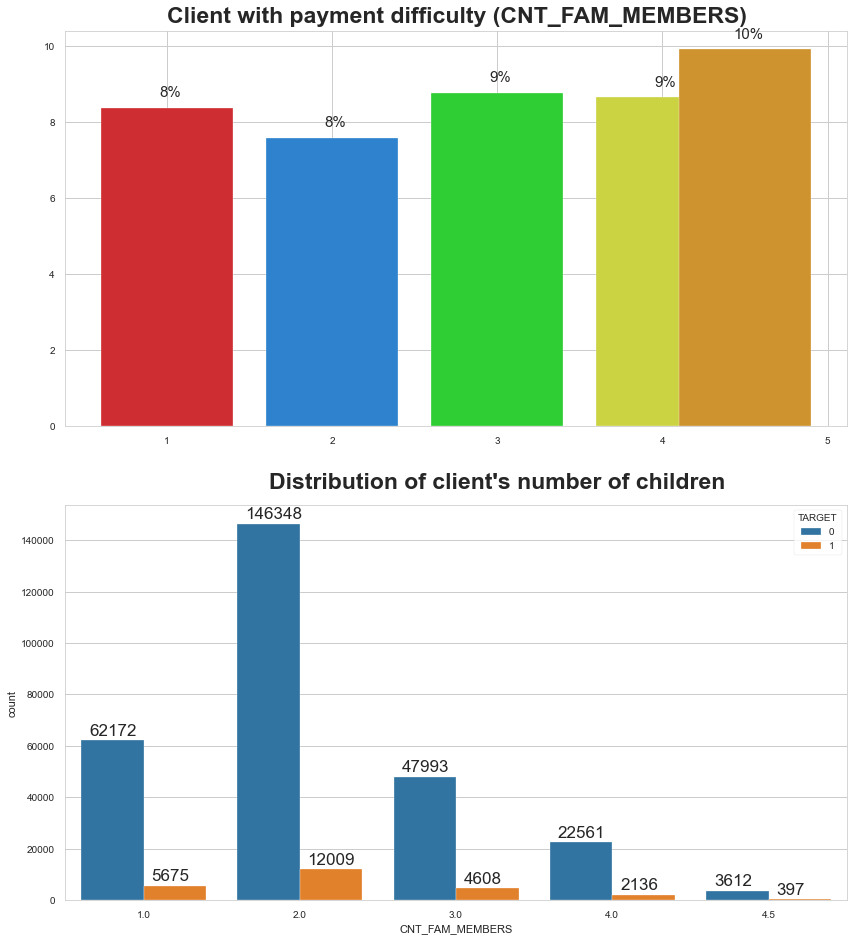

In [42]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (14, 16))

a1 = df1['CNT_FAM_MEMBERS'].value_counts()
b1 = df0['CNT_FAM_MEMBERS'].value_counts()
    
total = dict(train['CNT_FAM_MEMBERS'].value_counts())
x0 = a1.index
x1 = b1.index
    
y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

ax1.bar(x0, y0, color = ['#2e82ce', '#ce2e31', '#2ece34', '#ccd343', '#ce932e'])
for bar in ax1.patches:
        bar_height = bar.get_height()
        ax1.annotate('{0:.0f}%'.format(bar_height),
                xy = (bar.get_x() + bar.get_width()/2, bar_height),
                xytext = (3,8), textcoords = 'offset points', ha = 'center', va = 'bottom', size= 15)
        
ax1.text(x = 1, y = 10.6, s = "Client with payment difficulty (CNT_FAM_MEMBERS)",
           size = 23, weight = 'bold')

ax2 = sns.countplot(data=train, x='CNT_FAM_MEMBERS', hue='TARGET')


for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax2.annotate(f'{int(height)}', (x + 0.05, height + 2000), size = 17)

ax2.text(x = 0.8, y = 160000, s = "Distribution of client's number of children",
           size = 23, weight = 'bold')
plt.show()

- Each family has about 1 to 5 members and most customers have 2 family members.
- Also the highest amount of people who can paid their loan is from clients have 2 family members. 

-> There is not much information and difference in the loan repayment status for the customer -> This feature is not very useful

In [43]:
# fig, (ax1, ax2) = plt.subplots(2,1, figsize = (12, 10))

# ax1.boxplot(train['REGION_POPULATION_RELATIVE'], patch_artist=True, vert=False)

# sns.distplot(train['REGION_POPULATION_RELATIVE'], color = 'green')
# fig.text(0.9, 0.8, "REGION_POPULATION_RELATIVE", fontsize = 9, fontweight = 'bold', fontfamily = 'serif')
# plt.yticks(fontsize = 9)
# plt.box(False)
# t1 = train.loc[
#     (train['TARGET'] == 1) &
#     (train['REGION_POPULATION_RELATIVE']),
#     ['REGION_POPULATION_RELATIVE']
# ]
# t0 = train.loc[
#     (train['TARGET'] == 0) &
#     (train['REGION_POPULATION_RELATIVE']),
#     ['REGION_POPULATION_RELATIVE']
# ]
# sns.set_style('whitegrid')
# plt.figure()


# sns.kdeplot(t1['REGION_POPULATION_RELATIVE'], bw=0.5,label="Client with payment difficulty")
# sns.kdeplot(t0['REGION_POPULATION_RELATIVE'], bw=0.5,label="Client without payment difficulty")
# plt.ylabel('Density plot', fontsize=12)
# plt.xlabel('REGION_POPULATION_RELATIVE', fontsize=12)
# locs, labels = plt.xticks()
# plt.tick_params(axis='both', which='major', labelsize=12)
# plt.legend()
# plt.show()

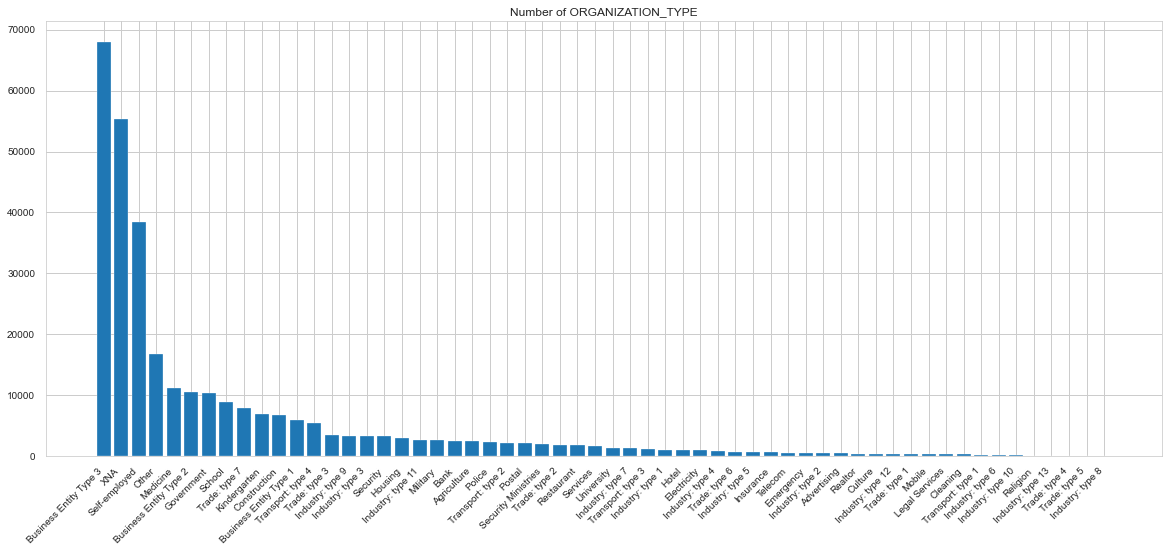

In [44]:
per_organization = train['ORGANIZATION_TYPE'].value_counts()
per_organization.sort_values(ascending=False, inplace=True)

#The percentage of value by target = 1
per_organization_tar = train[['ORGANIZATION_TYPE', 'TARGET']].groupby(['ORGANIZATION_TYPE'], as_index=False).mean()
per_organization_tar.sort_values(by='TARGET', ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(20,8))
plt.bar(per_organization.index, per_organization.values)
plt.xticks(rotation=45, ha='right')
plt.title('Number of ORGANIZATION_TYPE');

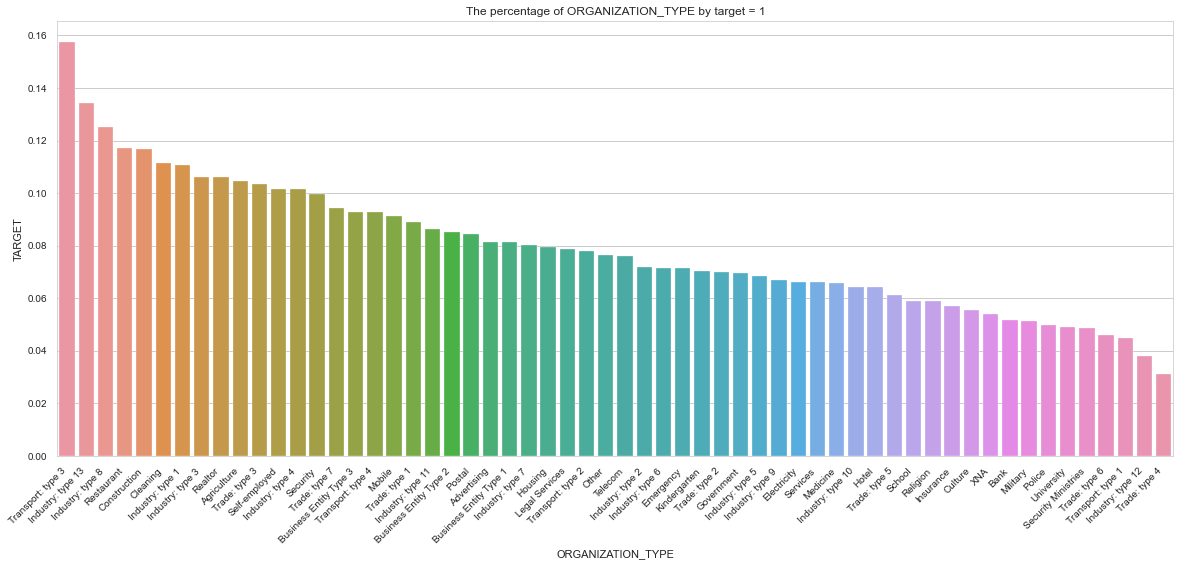

In [45]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=per_organization_tar, x='ORGANIZATION_TYPE', y='TARGET')
plt.xticks(rotation=45, ha='right')
plt.title('The percentage of ORGANIZATION_TYPE by target = 1');

Type of organization that have the highest non-repayment rate is 
- Transport: type 3 with the percentage nearly 16%
- Industry: type 13 with the percentage nearly 14%
- Industry: Type 8 with the percentage appreximatly 12

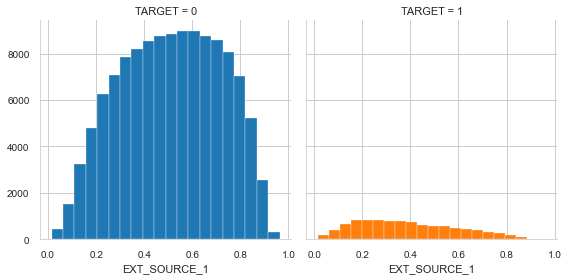

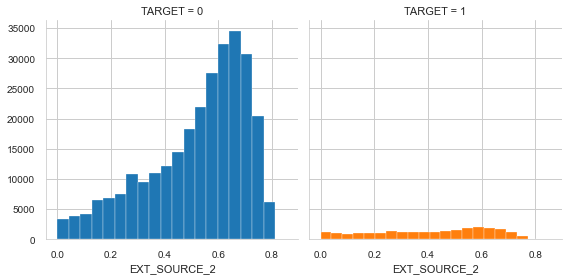

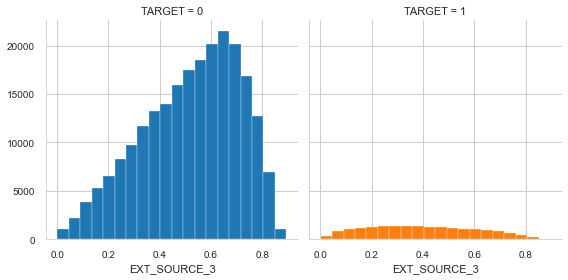

In [46]:
ext_source = train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
for i in ext_source:
    grid = sns.FacetGrid(train, col='TARGET', height=4, aspect=1, hue = 'TARGET')
    grid.map(plt.hist, i, bins=20)

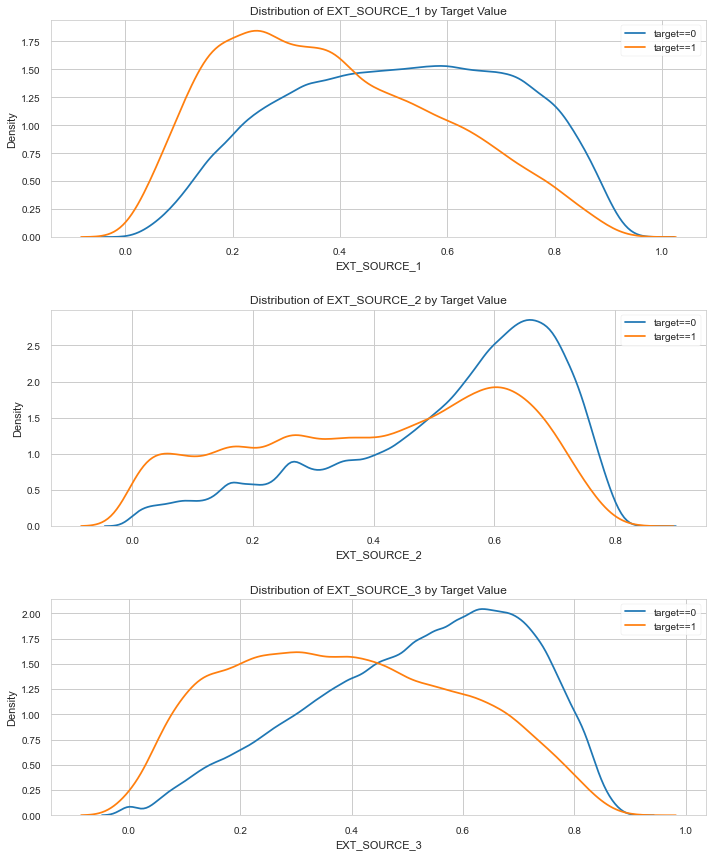

In [47]:
plt.figure(figsize=(10,12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3,1,i+1)
    
    sns.kdeplot(train.loc[train['TARGET']==0,source],label='target==0')
    sns.kdeplot(train.loc[train['TARGET']==1,source],label='target==1')
    
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' %source);
    plt.ylabel('Density');
    plt.legend()
plt.tight_layout(h_pad=2.5)

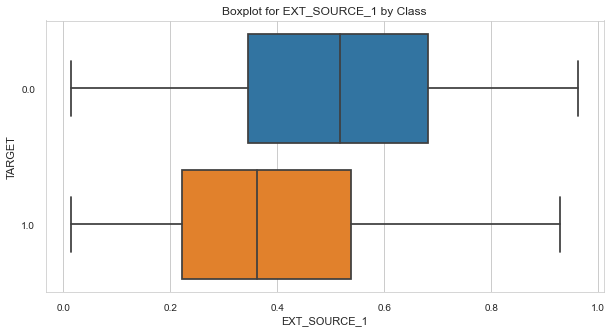

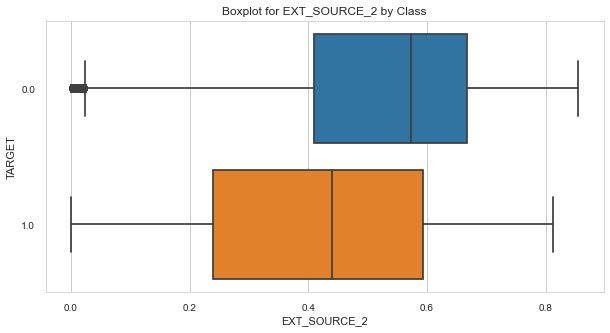

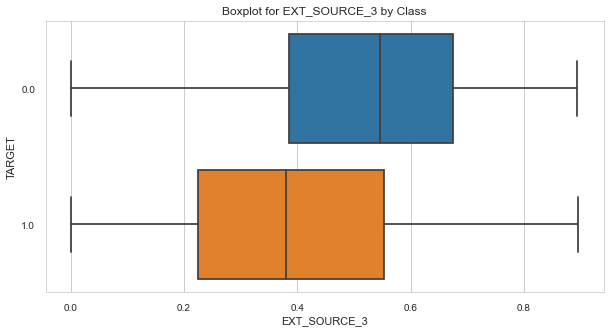

In [48]:
for i in ext_source:
    plt.subplots(figsize=(10, 5))
    sns.boxplot(data=train, x = data[i], y = data['TARGET'], orient = "h")
    plt.title(f'Boxplot for {i} by Class')
    plt.show()

- Since these 3 feature is the highest negative correlation among all, it shows a strong negative correlation with the target variable. The higher the score, the lower the probability that the person will default on their loan.
- From these visualizations, we glean that borrowers with higher scores from all three external sources were more likely to repay their loans.

In [49]:
train['DAYS_ID_PUBLISH'] = train['DAYS_ID_PUBLISH'].values*-1/365

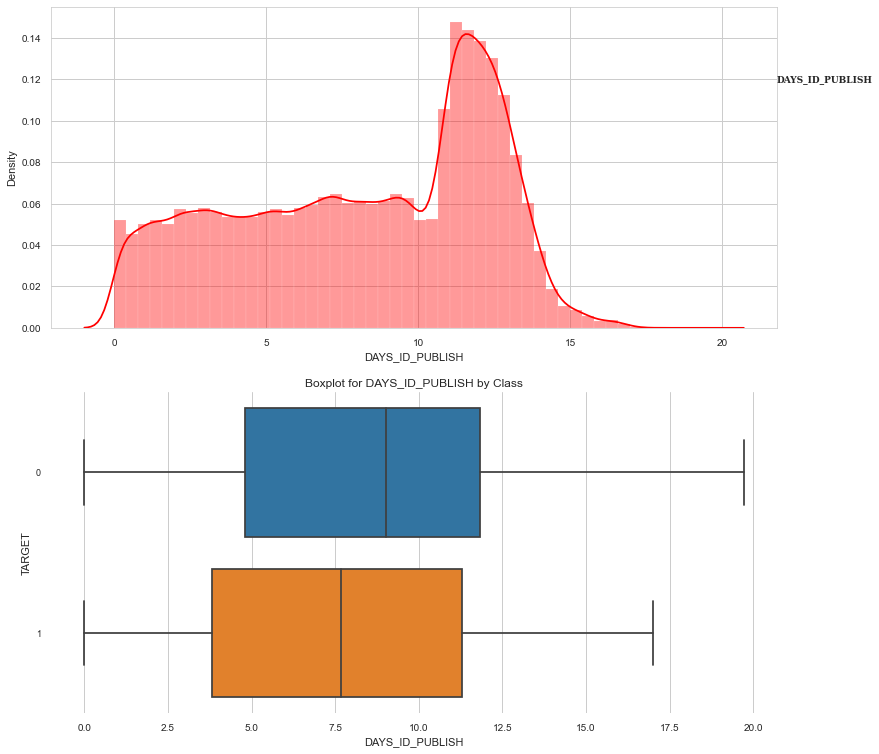

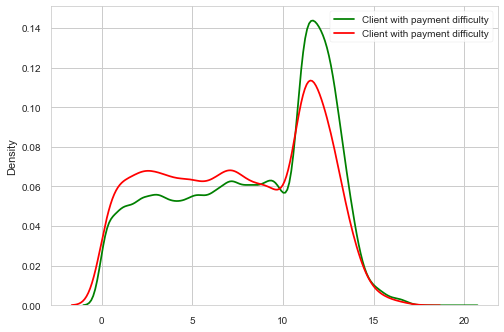

In [50]:
fig, (ax2, ax3) = plt.subplots(2,1, figsize = (13, 13))

sns.distplot(train['DAYS_ID_PUBLISH'].dropna(), color = 'red', ax = ax2)
fig.text(0.9, 0.8, "DAYS_ID_PUBLISH", fontsize = 9, fontweight = 'bold', fontfamily = 'serif')
plt.yticks(fontsize = 9)
plt.box(False)

sns.boxplot(data=train, x = train['DAYS_ID_PUBLISH'], y = train['TARGET'], orient = "h", ax = ax3)
plt.title(f'Boxplot for DAYS_ID_PUBLISH by Class')

t1 = train[train['TARGET']==0]['DAYS_ID_PUBLISH'].values
t0 = train[train['TARGET']==1]['DAYS_ID_PUBLISH'].values
sns.set_style('whitegrid')
plt.figure()


sns.distplot(t1,hist=False,label="Client with payment difficulty", color='green')
sns.distplot(t0,hist=False,label="Client with payment difficulty", color='red')
plt.legend()
plt.show()

Most of the clients have changed their identity document around 4000 days (10.95 years)
before the application date.

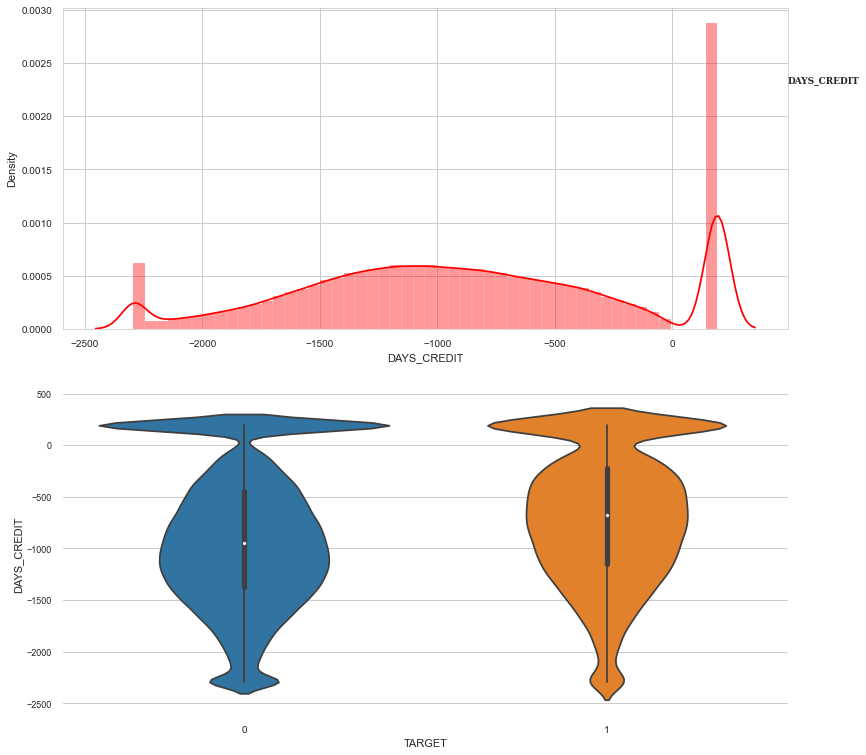

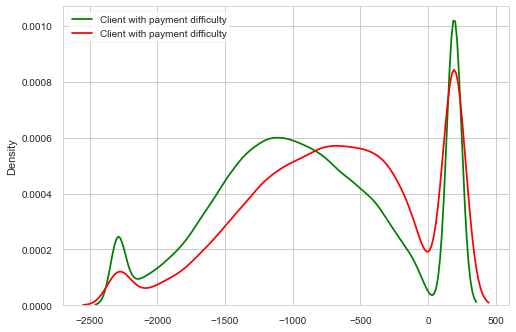

In [51]:
fig, (ax2, ax3) = plt.subplots(2,1, figsize = (13, 13))

sns.distplot(train['DAYS_CREDIT'].dropna(), color = 'red', ax = ax2)
fig.text(0.9, 0.8, "DAYS_CREDIT", fontsize = 9, fontweight = 'bold', fontfamily = 'serif')
plt.yticks(fontsize = 9)
plt.box(False)

sns.violinplot(x='TARGET', y='DAYS_CREDIT', data=train, ax = ax3)

t1 = train[train['TARGET']==0]['DAYS_CREDIT'].values
t0 = train[train['TARGET']==1]['DAYS_CREDIT'].values
sns.set_style('whitegrid')
plt.figure()

ax1.boxplot(train['DAYS_CREDIT'], patch_artist=True, vert=False)

sns.distplot(t1,hist=False,label="Client with payment difficulty", color='green')
sns.distplot(t0,hist=False,label="Client with payment difficulty", color='red')
plt.legend()
plt.show()

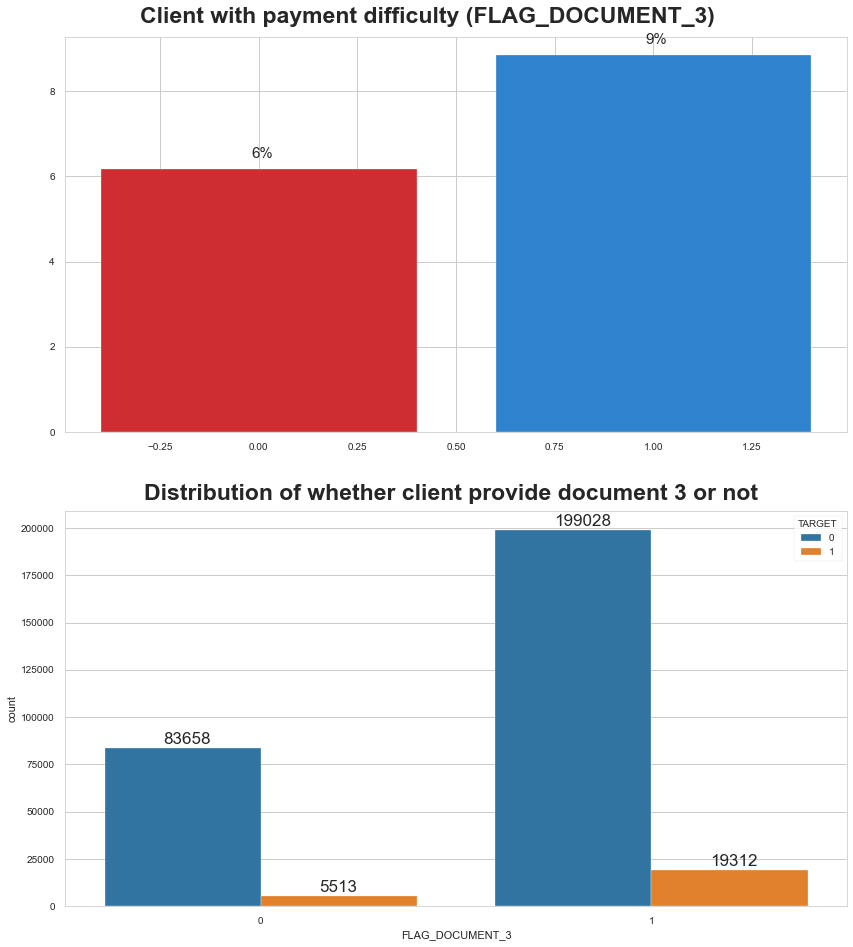

In [52]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (14, 16))

a1 = df1['FLAG_DOCUMENT_3'].value_counts()
b1 = df0['FLAG_DOCUMENT_3'].value_counts()
    
total = dict(train['FLAG_DOCUMENT_3'].value_counts())
x0 = a1.index
x1 = b1.index
    
y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

ax1.bar(x0, y0, color = ['#2e82ce', '#ce2e31'])
for bar in ax1.patches:
        bar_height = bar.get_height()
        ax1.annotate('{0:.0f}%'.format(bar_height),
                xy = (bar.get_x() + bar.get_width()/2, bar_height),
                xytext = (3,8), textcoords = 'offset points', ha = 'center', va = 'bottom', size= 15)

ax1.text(x = -0.3, y = 9.6, s = "Client with payment difficulty (FLAG_DOCUMENT_3)",
           size = 23, weight = 'bold')
        
ax2 = sns.countplot(data=train, x='FLAG_DOCUMENT_3', hue='TARGET')

for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax2.annotate(f'{int(height)}', (x + 0.15, height + 2000), size = 17)

ax2.text(x = -0.3, y = 215000, s = "Distribution of whether client provide document 3 or not",
           size = 23, weight = 'bold')
plt.show()

## DAYS_LAST_PHONE_CHANGE: How many days before application did client change phone

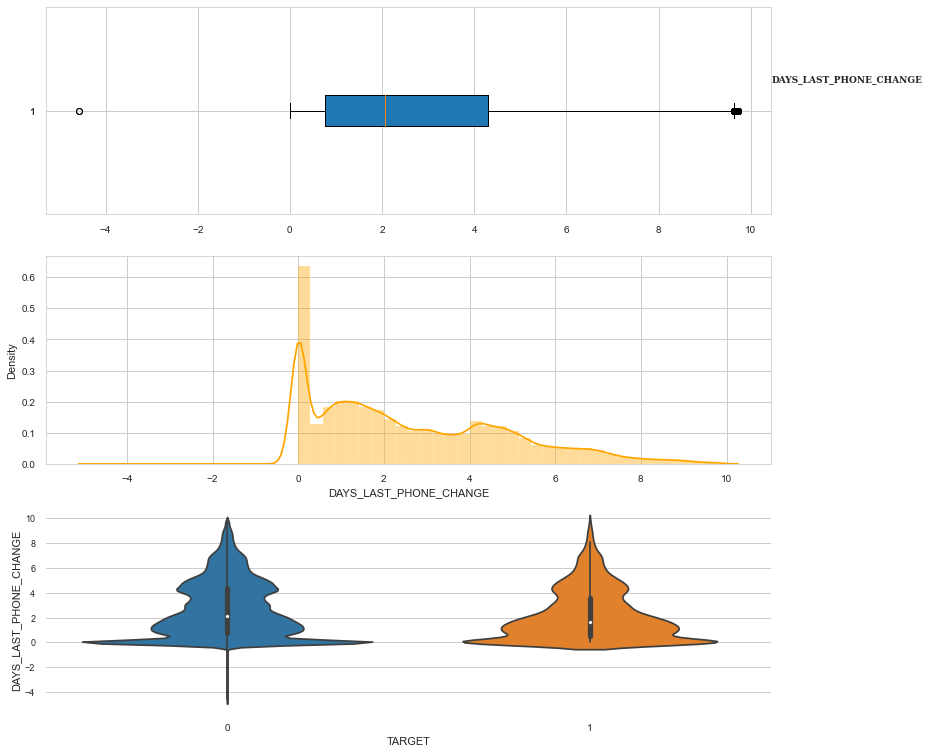

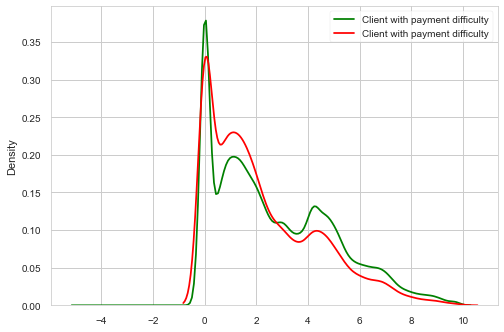

In [53]:
train['DAYS_LAST_PHONE_CHANGE'] = train['DAYS_LAST_PHONE_CHANGE'].values*-1/365

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (13, 13))

ax1.boxplot(train['DAYS_LAST_PHONE_CHANGE'], patch_artist=True, vert=False)

sns.distplot(train['DAYS_LAST_PHONE_CHANGE'].dropna(), color = 'orange', ax = ax2)
fig.text(0.9, 0.8, "DAYS_LAST_PHONE_CHANGE", fontsize = 9, fontweight = 'bold', fontfamily = 'serif')
plt.yticks(fontsize = 9)
plt.box(False)

sns.violinplot(x='TARGET', y='DAYS_LAST_PHONE_CHANGE', data=train, ax = ax3)

t1 = train[train['TARGET']==0]['DAYS_LAST_PHONE_CHANGE'].values
t0 = train[train['TARGET']==1]['DAYS_LAST_PHONE_CHANGE'].values
sns.set_style('whitegrid')
plt.figure()

ax1.boxplot(train['DAYS_LAST_PHONE_CHANGE'], patch_artist=True, vert=False)

sns.distplot(t1,hist=False,label="Client with payment difficulty", color='green')
sns.distplot(t0,hist=False,label="Client with payment difficulty", color='red')
plt.legend()
plt.show()

## Let's consider some important features to engineer and get new features for better result

In [54]:
income_by_education = train[[
    'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE'
]].groupby('NAME_EDUCATION_TYPE').median()['AMT_INCOME_TOTAL']

train['MEDIAN_INCOME_EDU_TYPE'] = train['NAME_EDUCATION_TYPE'].map(income_by_education)

In [55]:
train['BIRTH_EMPLOYED_PERCENT'] = train['DAYS_EMPLOYED'] / train['DAYS_BIRTH']

In [56]:
train['CREDIT_TERM'] = train['AMT_ANNUITY'] / train['AMT_CREDIT']
train['ANNUITY_LENGTH_EMPLOYED_PERCENT'] = train['CREDIT_TERM']/ train['DAYS_EMPLOYED']

In [57]:
#add back AMT_GOODS_PRICE for engineering
train['AMT_GOODS_PRICE'] = tmp['AMT_GOODS_PRICE']

In [58]:
train['CREDIT_INCOME_PERCENT'] = train['AMT_CREDIT'] / train['AMT_INCOME_TOTAL']
train['ANNUITY_INCOME_PERCENT'] = train['AMT_ANNUITY'] / train['AMT_INCOME_TOTAL']

In [59]:
income_by_education_df = income_by_education.to_frame().reset_index()
income_by_education_df

,NAME_EDUCATION_TYPE,AMT_INCOME_TOTAL
0,Academic degree,211500.0
1,Higher education,180000.0
2,Incomplete higher,157500.0
3,Lower secondary,112500.0
4,Secondary / secondary special,135000.0


## MEDIAN_INCOME_EDU_TYPE: Median income by highest education type

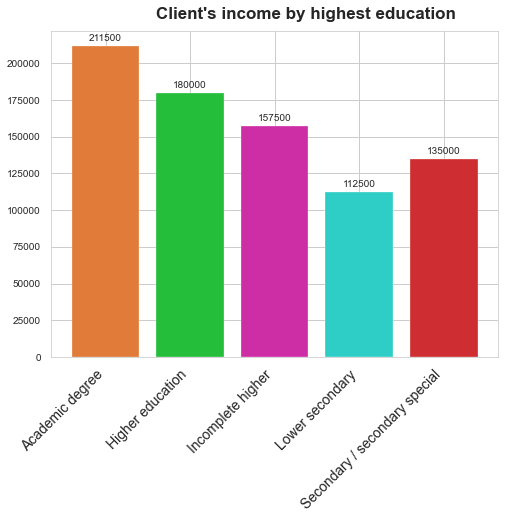

In [60]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(income_by_education_df['NAME_EDUCATION_TYPE'],
       income_by_education_df['AMT_INCOME_TOTAL'], color = ['#e07b39', '#25be3a', '#ce2ea5', '#2ecec6', '#ce2e31'])
for bar in ax.patches:
        bar_height = bar.get_height()
        ax.annotate('{0:.0f}'.format(bar_height),
                xy = (bar.get_x() + bar.get_width()/2, bar_height),
                xytext = (0,3), textcoords = 'offset points', ha = 'center', va = 'bottom')
ax.text(x = 0.6, y = 230000, s = "Client's income by highest education",
           size = 17, weight = 'bold')
labels = ['Academic degree', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Secondary / secondary special']

ax.set_xticklabels(labels, rotation=45, ha='right', size = 14)

sns.set_style('whitegrid')

plt.show()

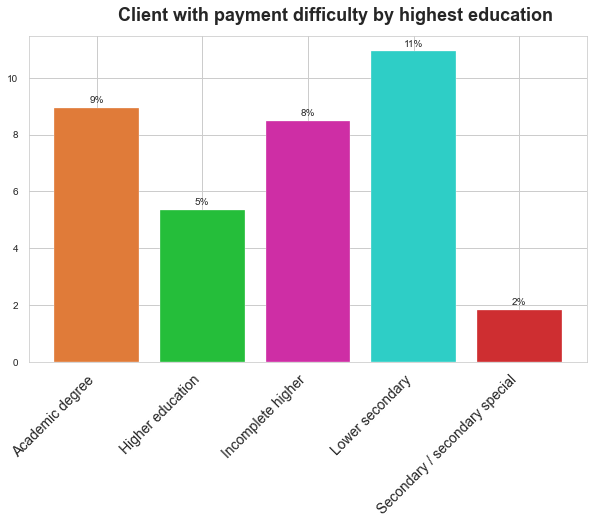

In [61]:
fig, ax2 = plt.subplots(figsize = (10, 6))
df1 = train[train["TARGET"] == 1]
df0 = train[train["TARGET"] == 0]
a1 = df1['MEDIAN_INCOME_EDU_TYPE'].value_counts()
b1 = df0['MEDIAN_INCOME_EDU_TYPE'].value_counts()
    
total = dict(train['MEDIAN_INCOME_EDU_TYPE'].value_counts())
x0 = a1.index
x1 = b1.index
    
y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

x1 = df1['NAME_EDUCATION_TYPE'].value_counts().index
x0 = df1['NAME_EDUCATION_TYPE'].value_counts().index

ax2.bar(x0, y0, color = ['#e07b39', '#25be3a', '#ce2ea5', '#2ecec6', '#ce2e31'])
for bar in ax2.patches:
        bar_height = bar.get_height()
        ax2.annotate('{0:.0f}%'.format(bar_height),
                xy = (bar.get_x() + bar.get_width()/2, bar_height),
                xytext = (0,3), textcoords = 'offset points', ha = 'center', va = 'bottom')
ax2.text(x = 0.2, y = 12, s = "Client with payment difficulty by highest education",
           size = 18, weight = 'bold')
labels = ['Academic degree', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Secondary / secondary special']

ax2.set_xticklabels(labels, rotation=45, ha='right', size = 14)
plt.show()

## BIRTH_EMPLOYED_PERCENT: Percentage of client's being employed over client's age

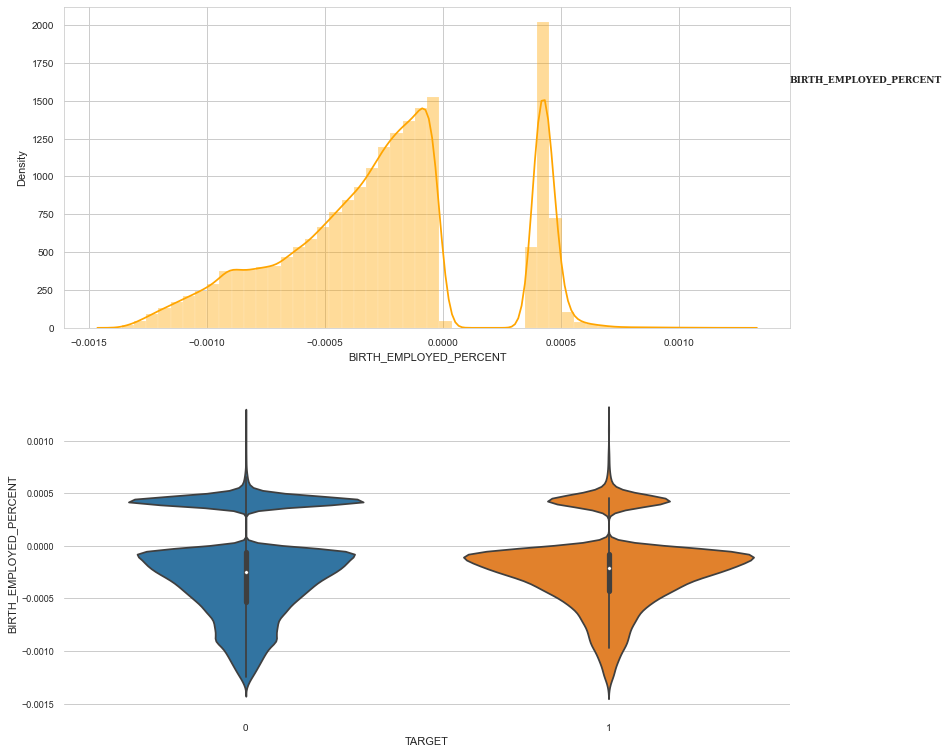

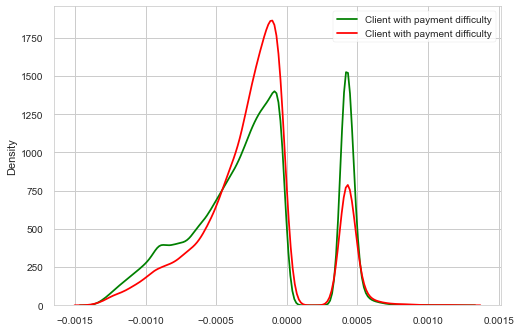

In [62]:
fig, (ax2, ax3) = plt.subplots(2,1, figsize = (13, 13))


sns.distplot(train['BIRTH_EMPLOYED_PERCENT'].dropna(), color = 'orange', ax = ax2)
fig.text(0.9, 0.8, "BIRTH_EMPLOYED_PERCENT", fontsize = 9, fontweight = 'bold', fontfamily = 'serif')
plt.yticks(fontsize = 9)
plt.box(False)

sns.violinplot(x='TARGET', y='BIRTH_EMPLOYED_PERCENT', data=train, ax = ax3)

t1 = train[train['TARGET']==0]['BIRTH_EMPLOYED_PERCENT'].values
t0 = train[train['TARGET']==1]['BIRTH_EMPLOYED_PERCENT'].values
sns.set_style('whitegrid')
plt.figure()

ax1.boxplot(train['BIRTH_EMPLOYED_PERCENT'], patch_artist=True, vert=False)

sns.distplot(t1,hist=False,label="Client with payment difficulty", color='green')
sns.distplot(t0,hist=False,label="Client with payment difficulty", color='red')
plt.legend()
plt.show()

## CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due

In [63]:
train['CREDIT_TERM'] = train.loc[train['CREDIT_TERM'] < 0.15, 'CREDIT_TERM']

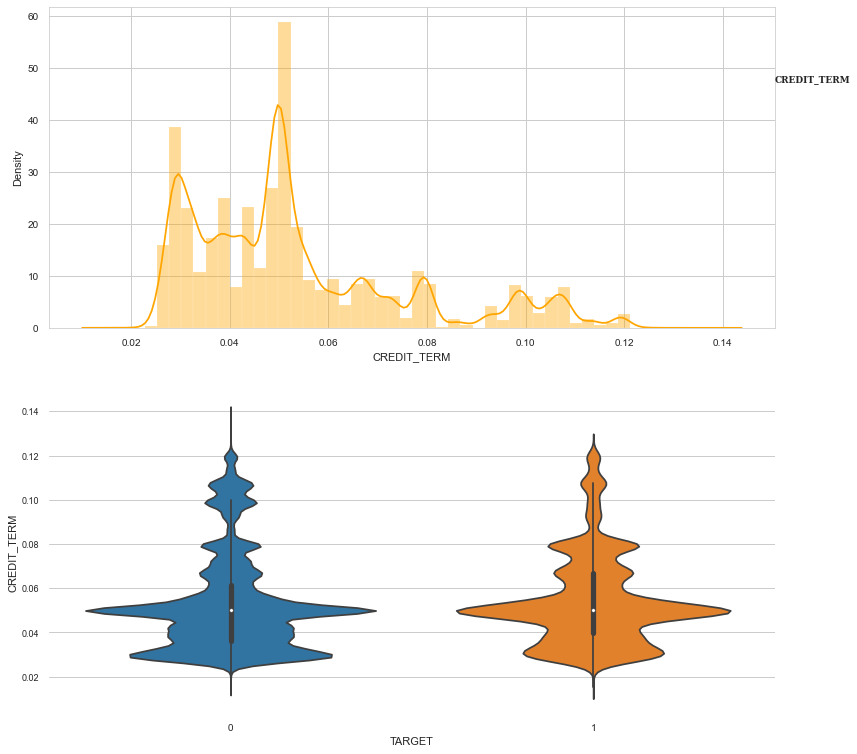

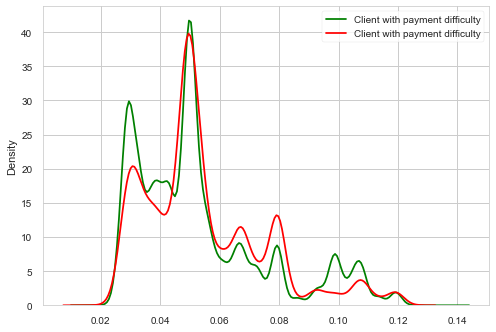

In [64]:
fig, (ax2, ax3) = plt.subplots(2,1, figsize = (13, 13))


sns.distplot(train['CREDIT_TERM'].dropna(), color = 'orange', ax = ax2)
fig.text(0.9, 0.8, "CREDIT_TERM", fontsize = 9, fontweight = 'bold', fontfamily = 'serif')
plt.yticks(fontsize = 9)
plt.box(False)

sns.violinplot(x='TARGET', y='CREDIT_TERM', data=train, ax = ax3)

t1 = train[train['TARGET']==0]['CREDIT_TERM'].values
t0 = train[train['TARGET']==1]['CREDIT_TERM'].values
sns.set_style('whitegrid')
plt.figure()

ax1.boxplot(train['CREDIT_TERM'], patch_artist=True, vert=False)

sns.distplot(t1,hist=False,label="Client with payment difficulty", color='green')
sns.distplot(t0,hist=False,label="Client with payment difficulty", color='red')
plt.legend()
plt.show()

## CREDIT_GOODS_DIFF: Difference between the credit amount vesus the price of the goods the loan payed for

In [65]:
train['AMT_GOODS_PRICE'] = tmp['AMT_GOODS_PRICE']

In [66]:
train['CREDIT_GOODS_DIFF'] = train['AMT_CREDIT'] - train['AMT_GOODS_PRICE']

In [67]:
#normalize
train['CREDIT_GOODS_DIFF'] = (train['CREDIT_GOODS_DIFF'] - train['CREDIT_GOODS_DIFF'].min())/(train['CREDIT_GOODS_DIFF'].max()-train['CREDIT_GOODS_DIFF'].min())

In [68]:
t1[t1 >0.3]

array([], dtype=float64)

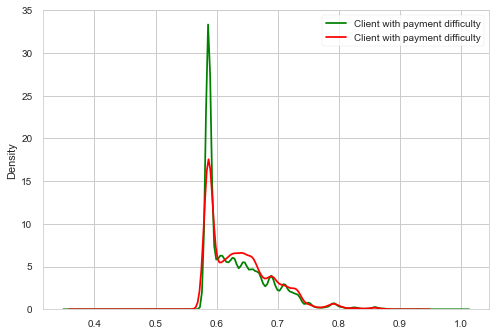

In [69]:
t1 = train[train['TARGET']==0]['CREDIT_GOODS_DIFF'].values
t0 = train[train['TARGET']==1]['CREDIT_GOODS_DIFF'].values
sns.set_style('whitegrid')
plt.figure()
t1 = t1[t1 >0.35]
t0 = t0[t0 >0.35]

sns.distplot(t1,hist=False,label="Client with payment difficulty", color='green',)
sns.distplot(t0,hist=False,label="Client with payment difficulty", color='red')
plt.legend()
plt.show()